In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Genel data tanıma : 
Elevation => Yükseklik
Aspect => ağacın yamaca göre derecesi
Slope => Eğim
Horizontal_Distance_To_Hydrology => su kaynağına yatay mesafesi
Horizontal_Distance_To_Roadways => yola yatay mesafesi
Hillshade_9am => ağacın saat 9 gibi gölge durumu
Horizontal_Distance_To_Fire_Points => yangın çıkma tehlikesi olan yerlere uzaklık.
class => target sutunu

In [78]:
df = pd.read_csv("treetypes.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


In [79]:
df["class"].value_counts()

KeyError: 'class'

In [80]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [83]:
df.apply(lambda x : x.nunique())
# tüm datada ki unique değerleri gösterir. eğer apply fonksiyonunu datanın kendisine uygularsak direk sutunlara uygular.
# her bir sutununun number of unique değerlerini gösterir.

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [86]:
## target labeli inceleme :
tree_type_dist = pd.DataFrame(df["Cover_Type"].value_counts())
tree_type_dist["ratio"] = df["Cover_Type"].value_counts(normalize=True)*100
tree_type_dist.columns = ["count","ratio"]
tree_type_dist
# en fazla türler 1 ve 2 numaralı değerlerdir. sol taraf kaç adet sağ taraf ise yüzdelik değeri.

,count,ratio
5,36079,14.4316
1,35836,14.3344
2,35780,14.3120
6,35695,14.2780
7,35690,14.2760
4,35529,14.2116
3,35391,14.1564


In [87]:
df.corr()["Cover_Type"].drop("Cover_Type").sort_values()
# class targetimiz ile diğer futureler arasında ki korelasyon durumları

Wilderness_Area_1                    -0.234256
Soil_Type_29                         -0.226205
Soil_Type_22                         -0.194972
Soil_Type_23                         -0.157837
Soil_Type_12                         -0.132962
Soil_Type_32                         -0.113352
Horizontal_Distance_To_Roadways      -0.108043
Hillshade_Noon                       -0.106578
Soil_Type_24                         -0.104999
Soil_Type_31                         -0.100483
Soil_Type_33                         -0.091653
Horizontal_Distance_To_Fire_Points   -0.088740
Hillshade_3pm                        -0.055023
Soil_Type_20                         -0.047214
Soil_Type_19                         -0.045424
Soil_Type_4                          -0.034178
Soil_Type_21                         -0.029766
Soil_Type_9                          -0.026515
Soil_Type_27                         -0.022307
Hillshade_9am                        -0.017806
Soil_Type_28                         -0.017554
Soil_Type_25 

In [88]:
df.isnull().sum().any()

False

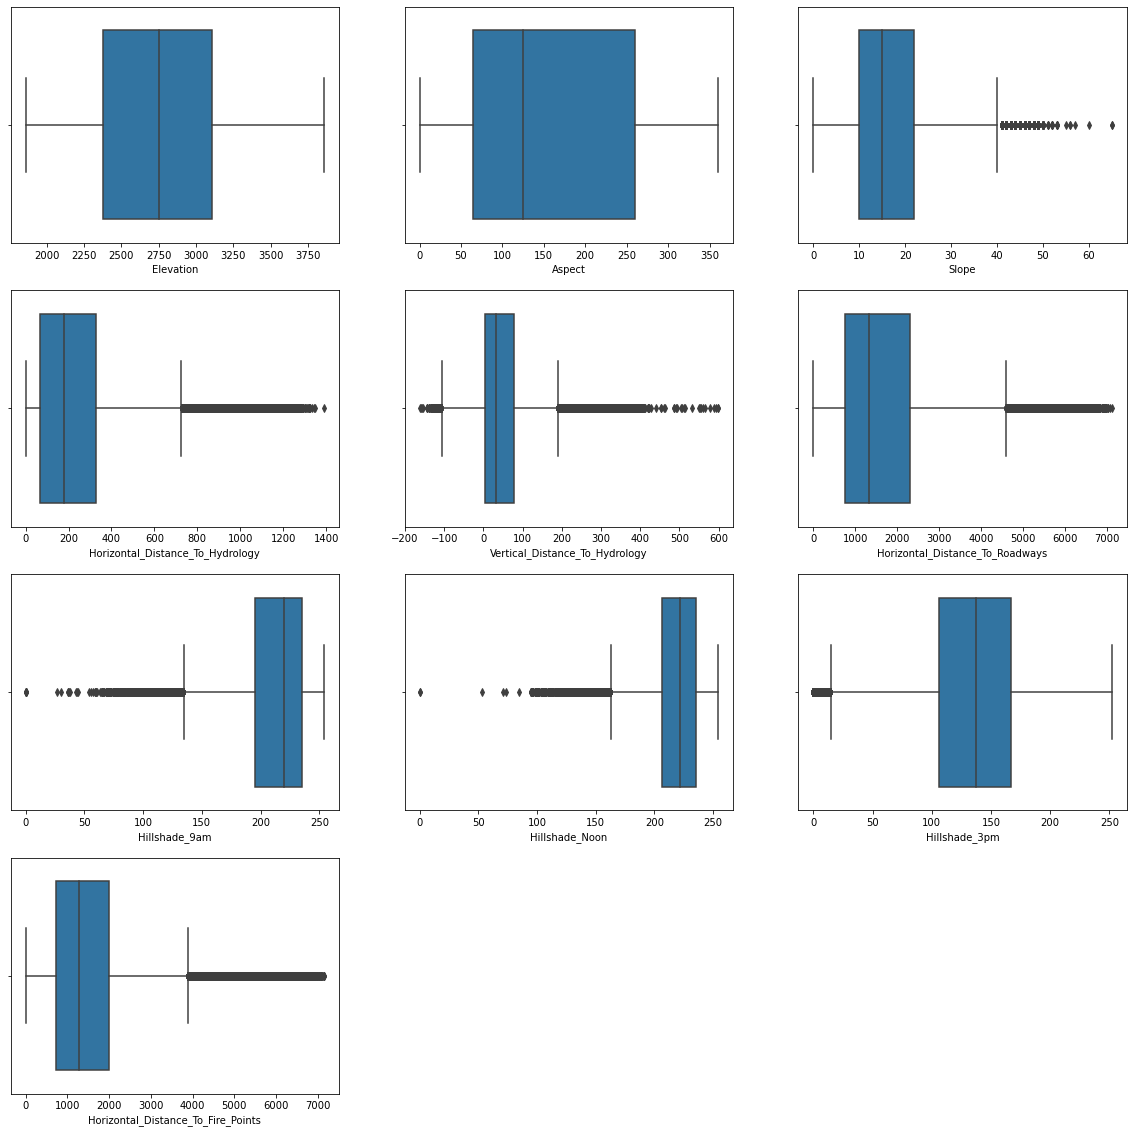

In [89]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    index+=1
    plt.subplot(4,3,index)
    sns.boxplot(x = feature, data = df, whis=1.5)
    # whis değerini 1.5 aldım. 

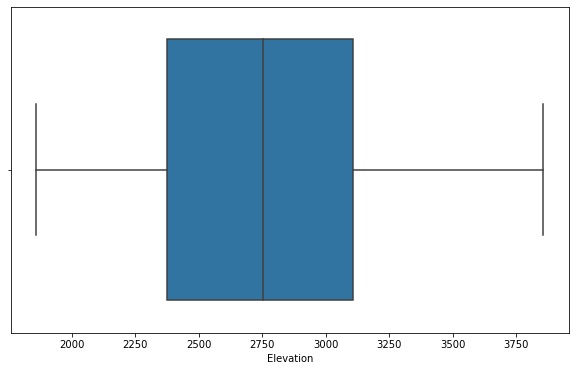

Elevation sutununun alt sınır değeri = 1275.5
Elevation sutununun üst sınır değeri = 4207.5
Elevation tablosunda toplamda = 0 aykırı alt veri vardır.
Elevation tablosunda toplamda = 0 aykırı üst veri vardır.


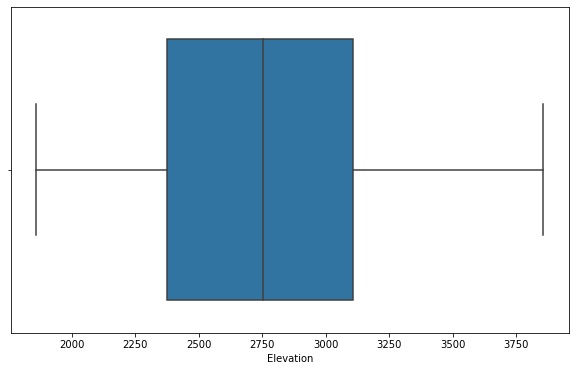

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


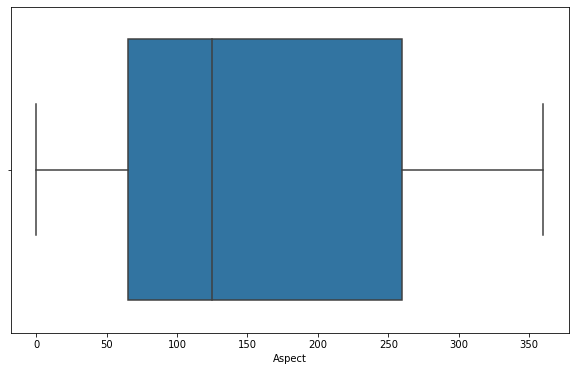

Aspect sutununun alt sınır değeri = -227.5
Aspect sutununun üst sınır değeri = 552.5
Aspect tablosunda toplamda = 0 aykırı alt veri vardır.
Aspect tablosunda toplamda = 0 aykırı üst veri vardır.


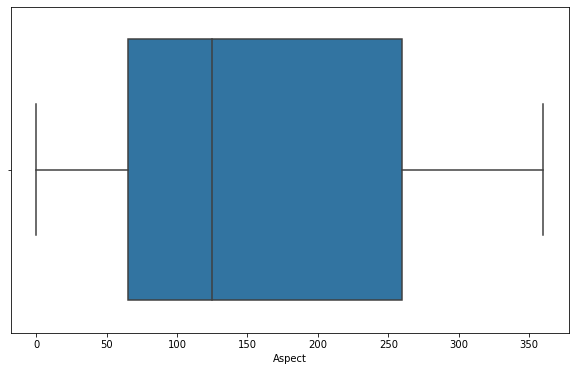

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


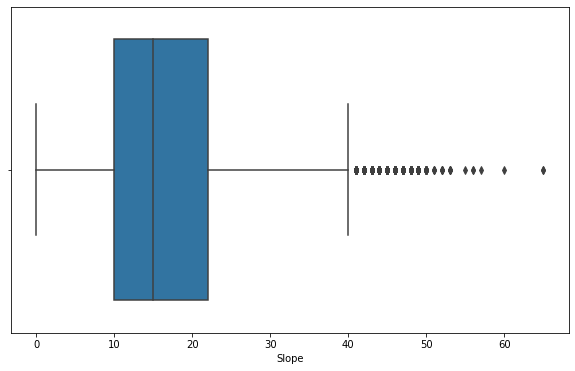

Slope sutununun alt sınır değeri = -8.0
Slope sutununun üst sınır değeri = 40.0
Slope tablosunda toplamda = 0 aykırı alt veri vardır.
Slope tablosunda toplamda = 850 aykırı üst veri vardır.


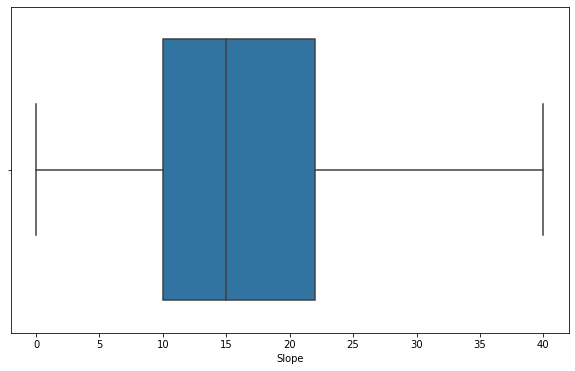

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


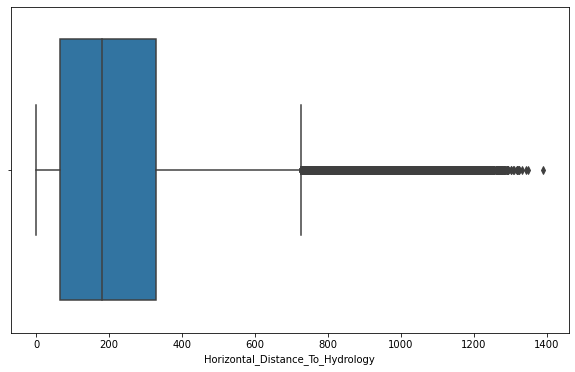

Horizontal_Distance_To_Hydrology sutununun alt sınır değeri = -330.0
Horizontal_Distance_To_Hydrology sutununun üst sınır değeri = 726.0
Horizontal_Distance_To_Hydrology tablosunda toplamda = 0 aykırı alt veri vardır.
Horizontal_Distance_To_Hydrology tablosunda toplamda = 8113 aykırı üst veri vardır.


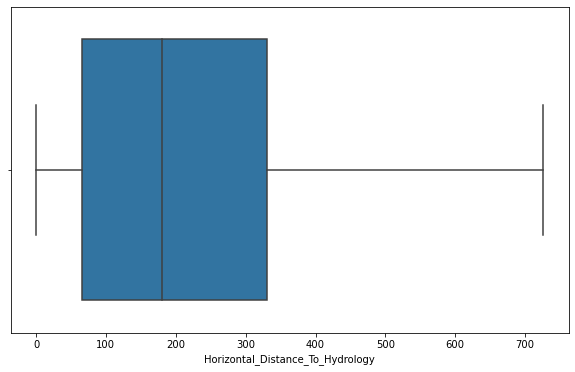

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


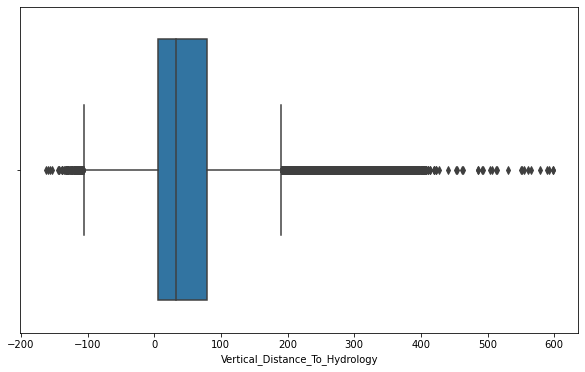

Vertical_Distance_To_Hydrology sutununun alt sınır değeri = -106.0
Vertical_Distance_To_Hydrology sutununun üst sınır değeri = 190.0
Vertical_Distance_To_Hydrology tablosunda toplamda = 116 aykırı alt veri vardır.
Vertical_Distance_To_Hydrology tablosunda toplamda = 9087 aykırı üst veri vardır.


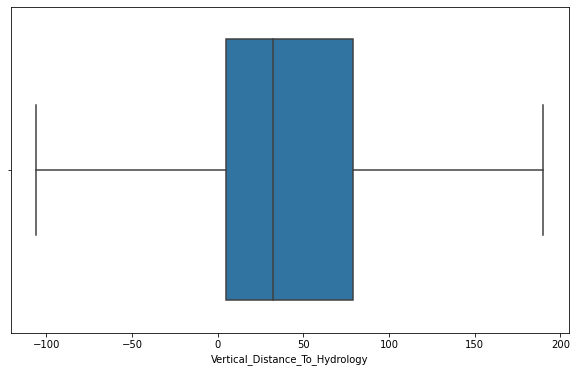

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


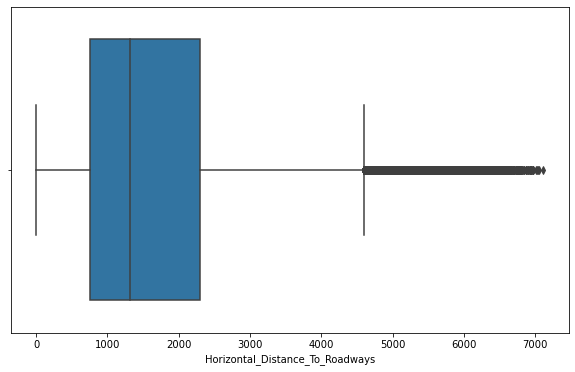

Horizontal_Distance_To_Roadways sutununun alt sınır değeri = -1551.0
Horizontal_Distance_To_Roadways sutununun üst sınır değeri = 4601.0
Horizontal_Distance_To_Roadways tablosunda toplamda = 0 aykırı alt veri vardır.
Horizontal_Distance_To_Roadways tablosunda toplamda = 12793 aykırı üst veri vardır.


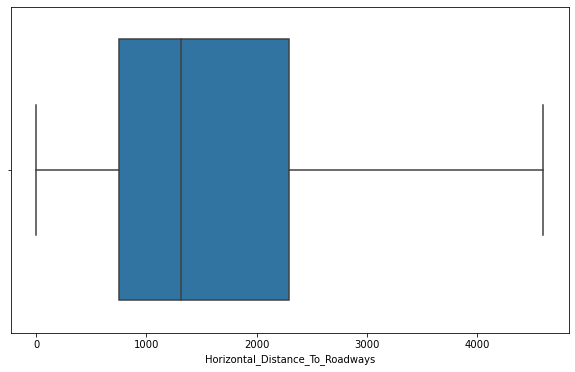

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


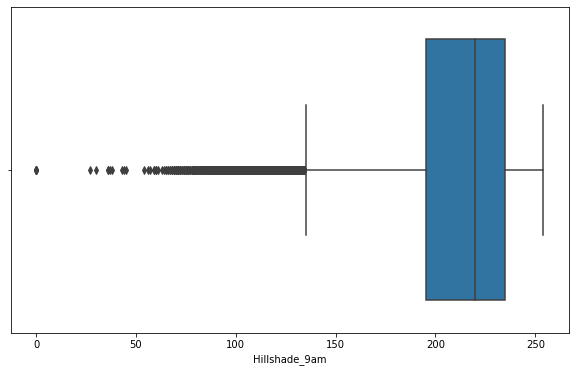

Hillshade_9am sutununun alt sınır değeri = 135.0
Hillshade_9am sutununun üst sınır değeri = 295.0
Hillshade_9am tablosunda toplamda = 5637 aykırı alt veri vardır.
Hillshade_9am tablosunda toplamda = 0 aykırı üst veri vardır.


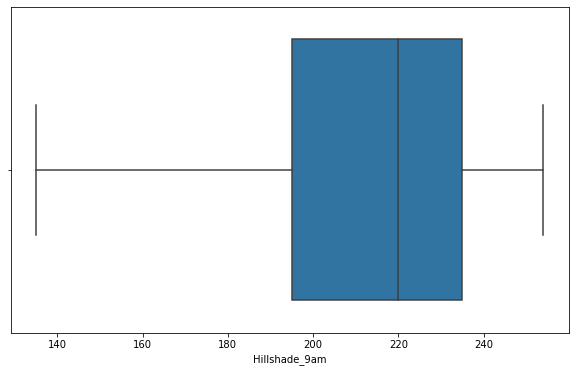

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


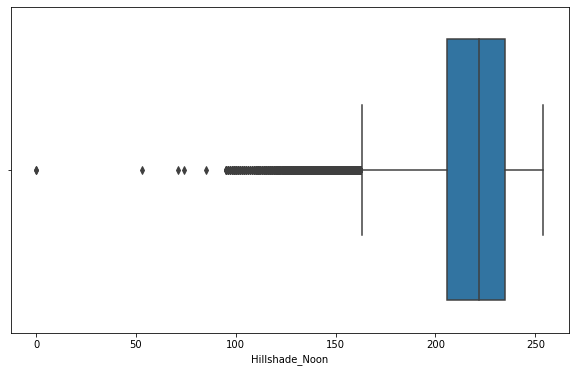

Hillshade_Noon sutununun alt sınır değeri = 162.5
Hillshade_Noon sutununun üst sınır değeri = 278.5
Hillshade_Noon tablosunda toplamda = 5911 aykırı alt veri vardır.
Hillshade_Noon tablosunda toplamda = 0 aykırı üst veri vardır.


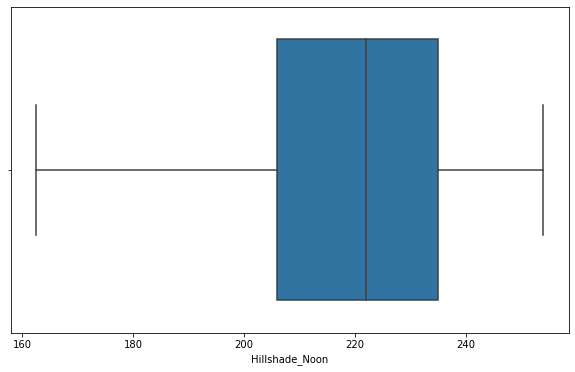

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


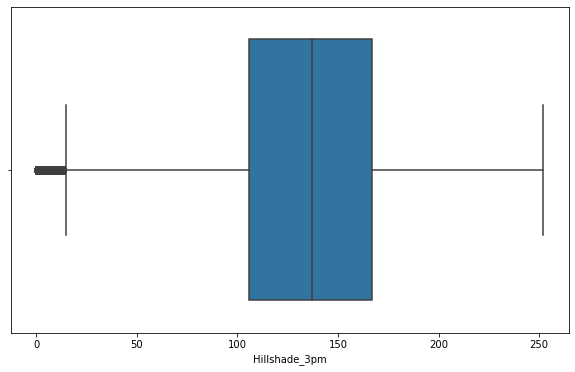

Hillshade_3pm sutununun alt sınır değeri = 14.5
Hillshade_3pm sutununun üst sınır değeri = 258.5
Hillshade_3pm tablosunda toplamda = 2195 aykırı alt veri vardır.
Hillshade_3pm tablosunda toplamda = 0 aykırı üst veri vardır.


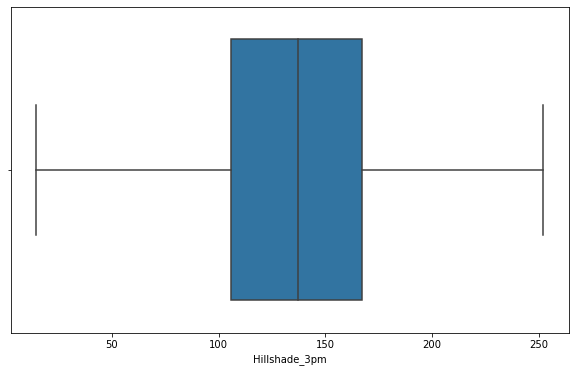

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


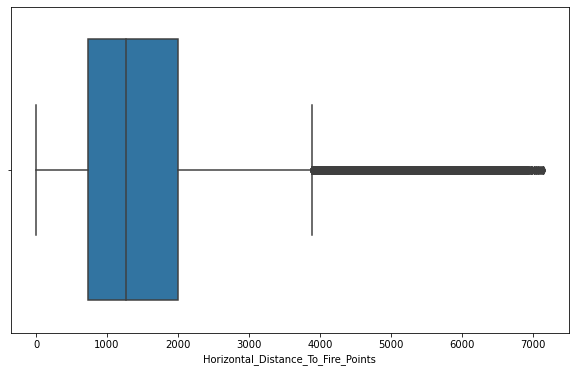

Horizontal_Distance_To_Fire_Points sutununun alt sınır değeri = -1162.0
Horizontal_Distance_To_Fire_Points sutununun üst sınır değeri = 3894.0
Horizontal_Distance_To_Fire_Points tablosunda toplamda = 0 aykırı alt veri vardır.
Horizontal_Distance_To_Fire_Points tablosunda toplamda = 10556 aykırı üst veri vardır.


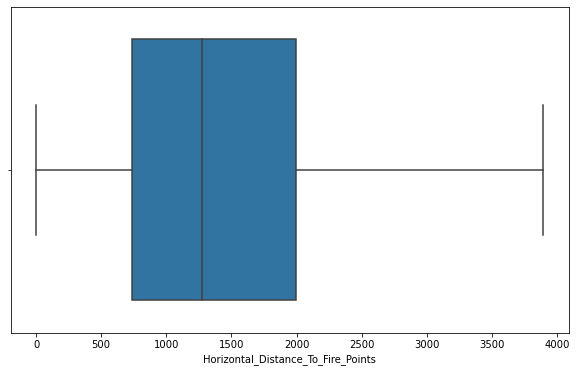

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


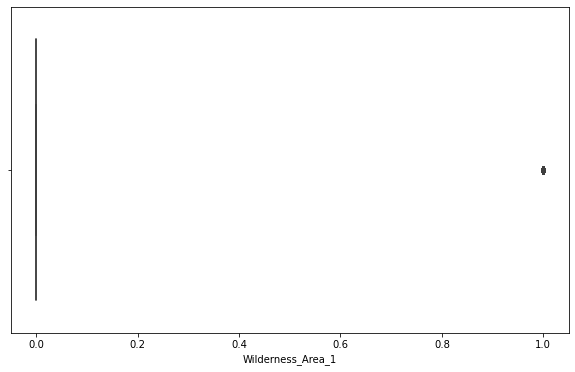

Wilderness_Area_1 sutununun alt sınır değeri = 0.0
Wilderness_Area_1 sutununun üst sınır değeri = 0.0
Wilderness_Area_1 tablosunda toplamda = 0 aykırı alt veri vardır.
Wilderness_Area_1 tablosunda toplamda = 59575 aykırı üst veri vardır.


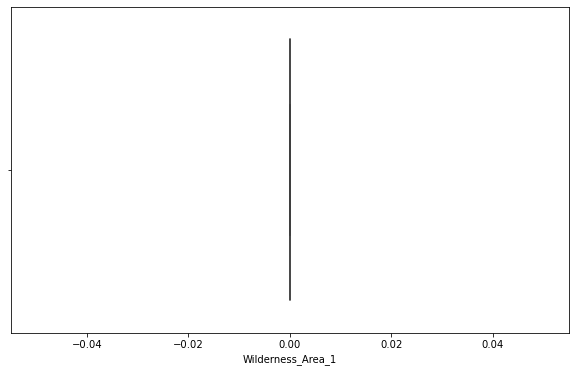

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


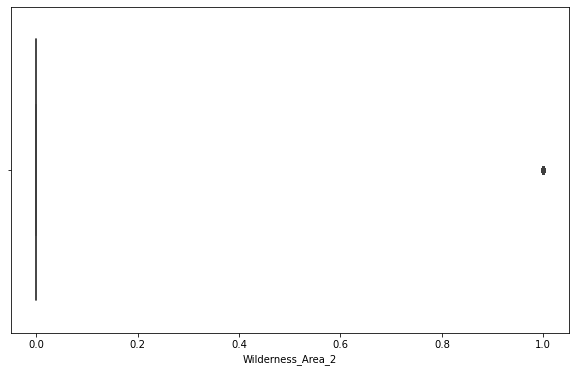

Wilderness_Area_2 sutununun alt sınır değeri = 0.0
Wilderness_Area_2 sutununun üst sınır değeri = 0.0
Wilderness_Area_2 tablosunda toplamda = 0 aykırı alt veri vardır.
Wilderness_Area_2 tablosunda toplamda = 8340 aykırı üst veri vardır.


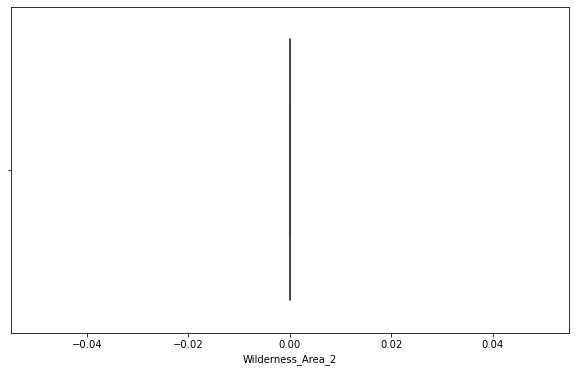

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


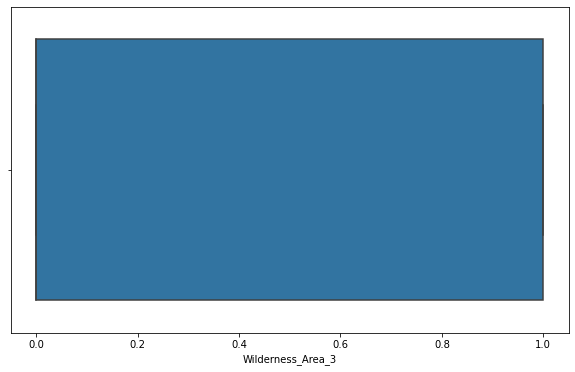

Wilderness_Area_3 sutununun alt sınır değeri = -1.5
Wilderness_Area_3 sutununun üst sınır değeri = 2.5
Wilderness_Area_3 tablosunda toplamda = 0 aykırı alt veri vardır.
Wilderness_Area_3 tablosunda toplamda = 0 aykırı üst veri vardır.


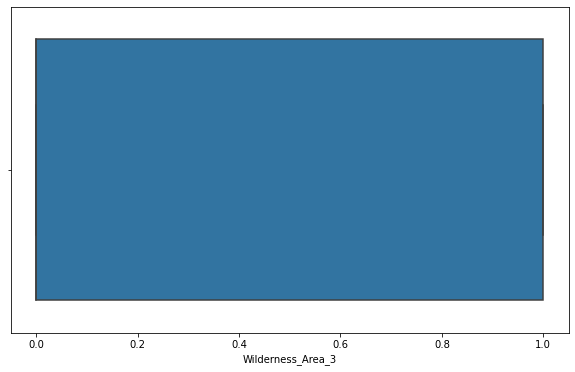

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


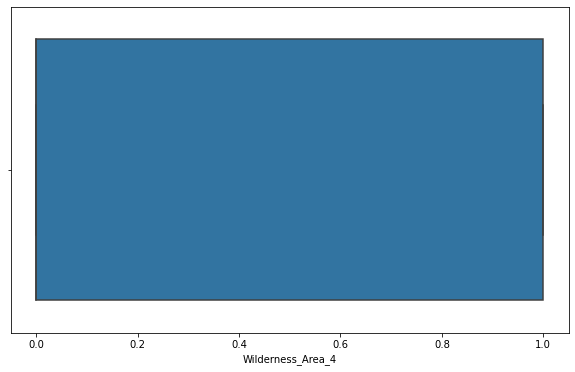

Wilderness_Area_4 sutununun alt sınır değeri = -1.5
Wilderness_Area_4 sutununun üst sınır değeri = 2.5
Wilderness_Area_4 tablosunda toplamda = 0 aykırı alt veri vardır.
Wilderness_Area_4 tablosunda toplamda = 0 aykırı üst veri vardır.


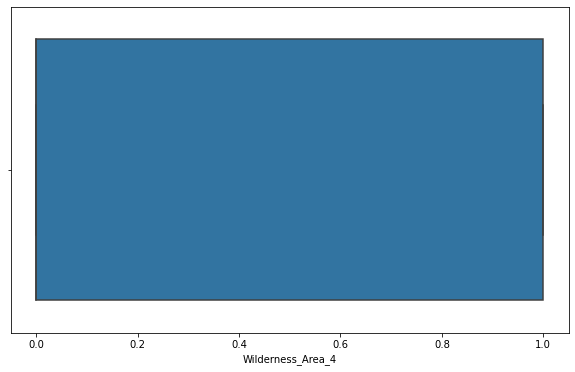

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


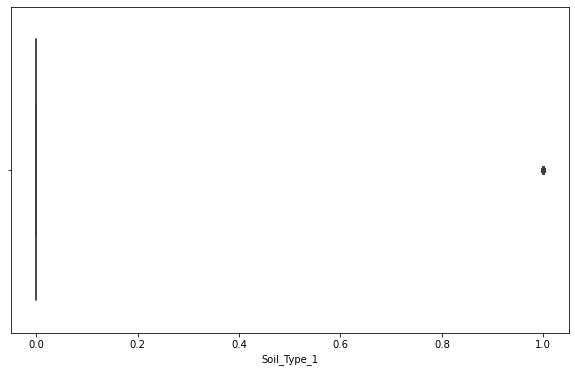

Soil_Type_1 sutununun alt sınır değeri = 0.0
Soil_Type_1 sutununun üst sınır değeri = 0.0
Soil_Type_1 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_1 tablosunda toplamda = 4586 aykırı üst veri vardır.


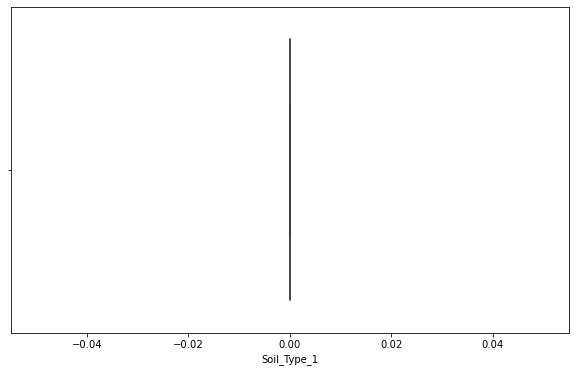

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


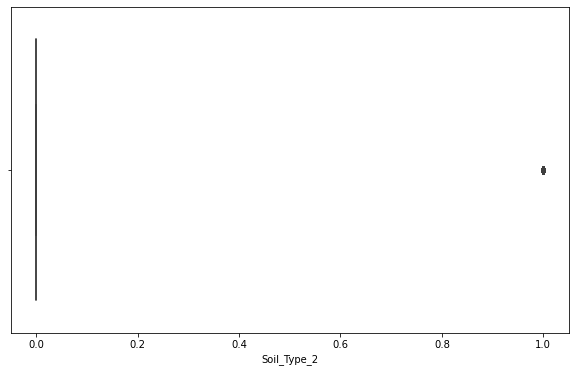

Soil_Type_2 sutununun alt sınır değeri = 0.0
Soil_Type_2 sutununun üst sınır değeri = 0.0
Soil_Type_2 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_2 tablosunda toplamda = 8966 aykırı üst veri vardır.


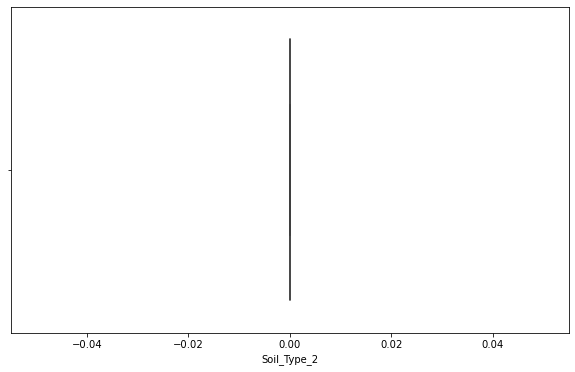

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


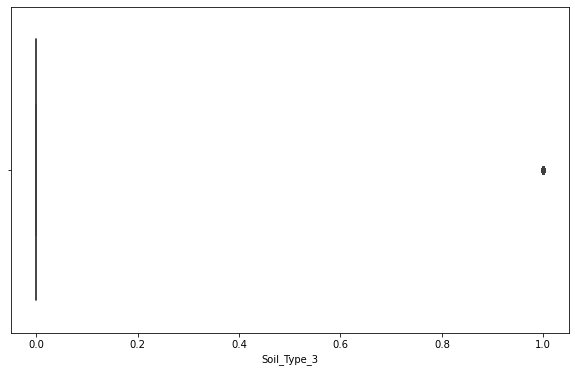

Soil_Type_3 sutununun alt sınır değeri = 0.0
Soil_Type_3 sutununun üst sınır değeri = 0.0
Soil_Type_3 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_3 tablosunda toplamda = 14594 aykırı üst veri vardır.


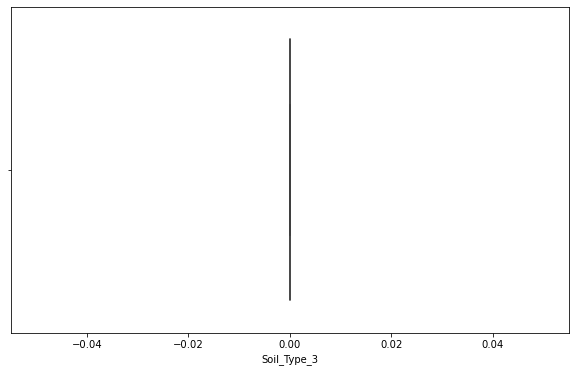

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


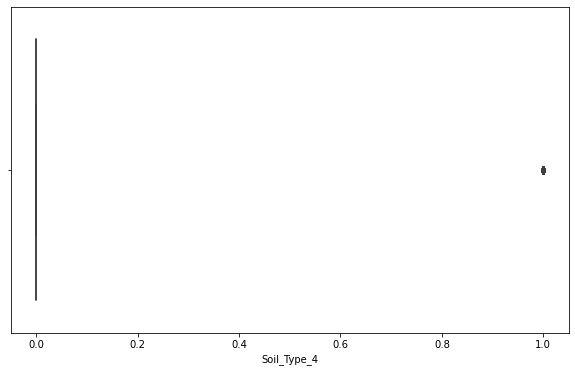

Soil_Type_4 sutununun alt sınır değeri = 0.0
Soil_Type_4 sutununun üst sınır değeri = 0.0
Soil_Type_4 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_4 tablosunda toplamda = 11730 aykırı üst veri vardır.


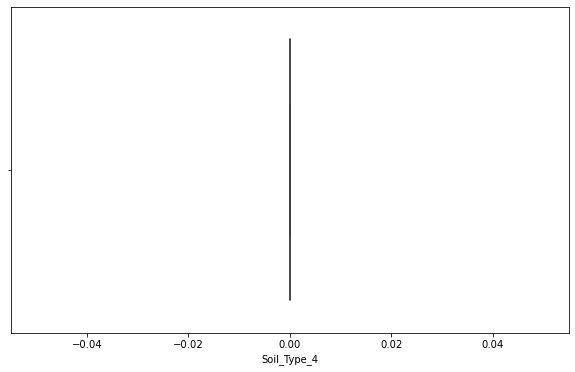

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


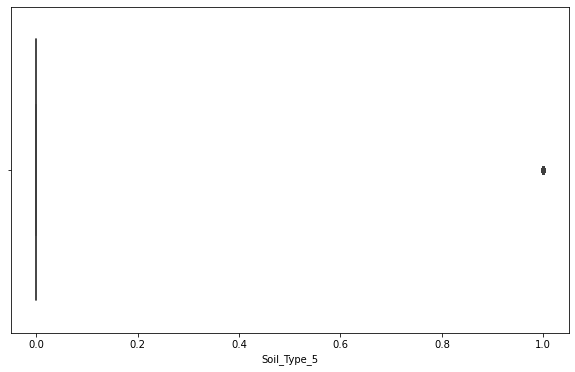

Soil_Type_5 sutununun alt sınır değeri = 0.0
Soil_Type_5 sutununun üst sınır değeri = 0.0
Soil_Type_5 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_5 tablosunda toplamda = 2259 aykırı üst veri vardır.


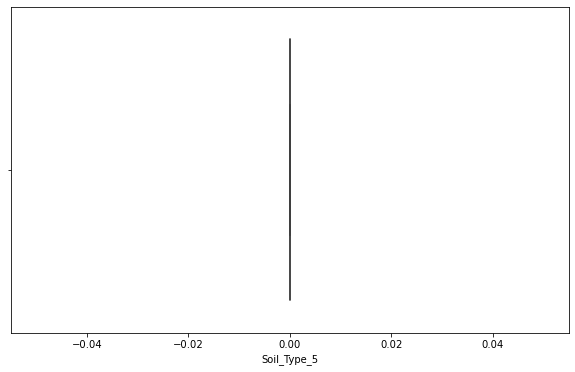

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


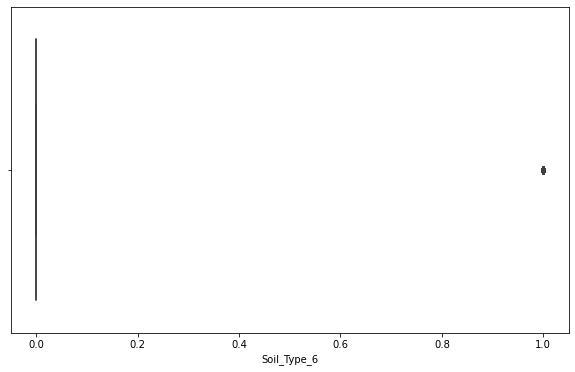

Soil_Type_6 sutununun alt sınır değeri = 0.0
Soil_Type_6 sutununun üst sınır değeri = 0.0
Soil_Type_6 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_6 tablosunda toplamda = 9349 aykırı üst veri vardır.


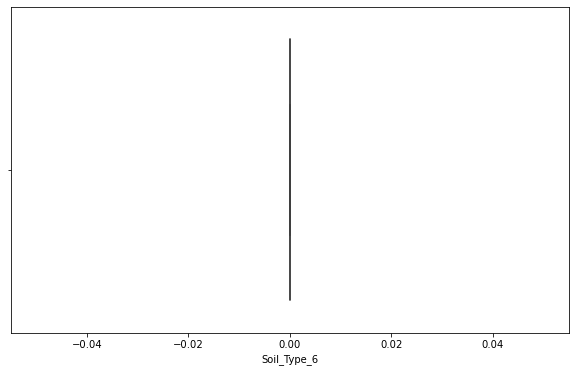

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


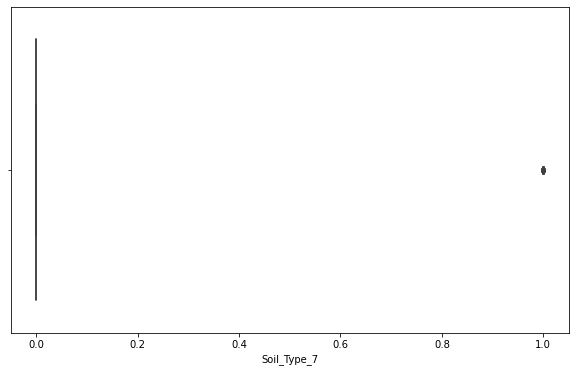

Soil_Type_7 sutununun alt sınır değeri = 0.0
Soil_Type_7 sutununun üst sınır değeri = 0.0
Soil_Type_7 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_7 tablosunda toplamda = 15 aykırı üst veri vardır.


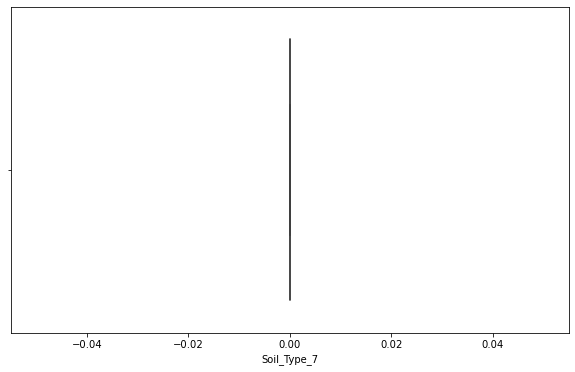

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


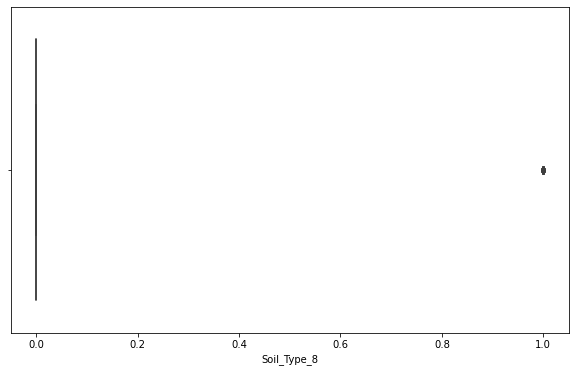

Soil_Type_8 sutununun alt sınır değeri = 0.0
Soil_Type_8 sutununun üst sınır değeri = 0.0
Soil_Type_8 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_8 tablosunda toplamda = 23 aykırı üst veri vardır.


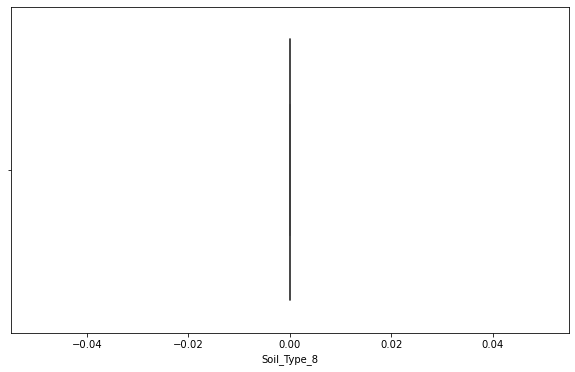

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


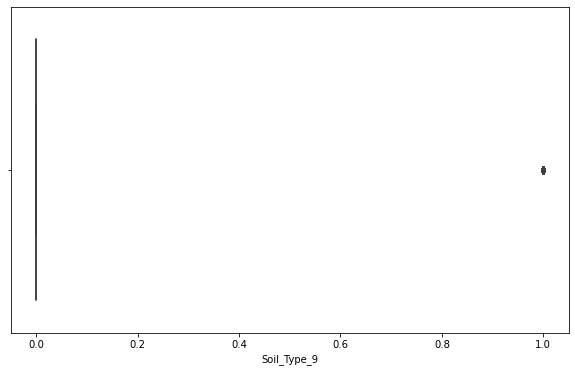

Soil_Type_9 sutununun alt sınır değeri = 0.0
Soil_Type_9 sutununun üst sınır değeri = 0.0
Soil_Type_9 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_9 tablosunda toplamda = 153 aykırı üst veri vardır.


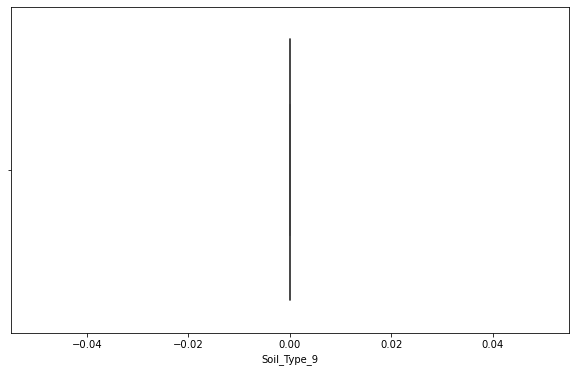

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


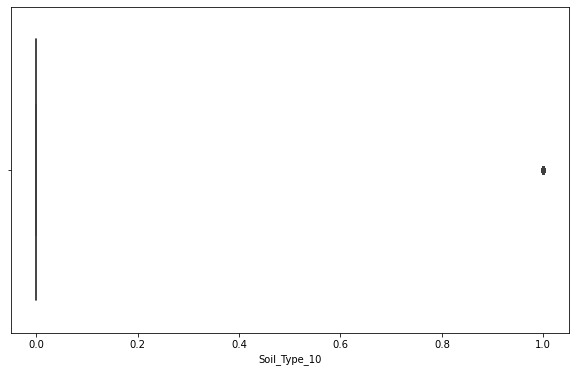

Soil_Type_10 sutununun alt sınır değeri = 0.0
Soil_Type_10 sutununun üst sınır değeri = 0.0
Soil_Type_10 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_10 tablosunda toplamda = 31533 aykırı üst veri vardır.


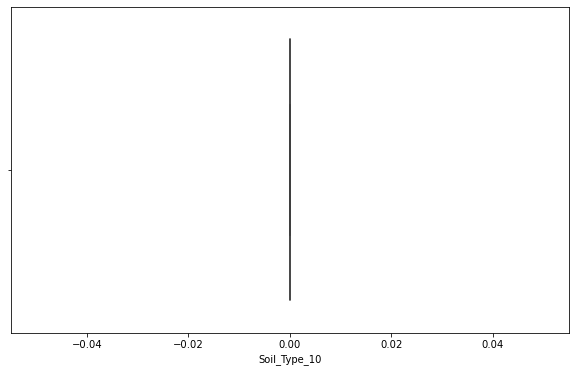

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


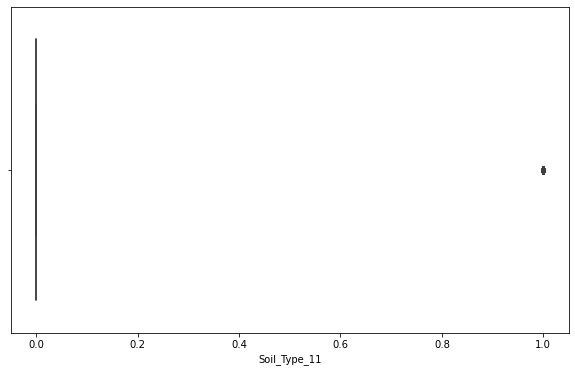

Soil_Type_11 sutununun alt sınır değeri = 0.0
Soil_Type_11 sutununun üst sınır değeri = 0.0
Soil_Type_11 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_11 tablosunda toplamda = 5901 aykırı üst veri vardır.


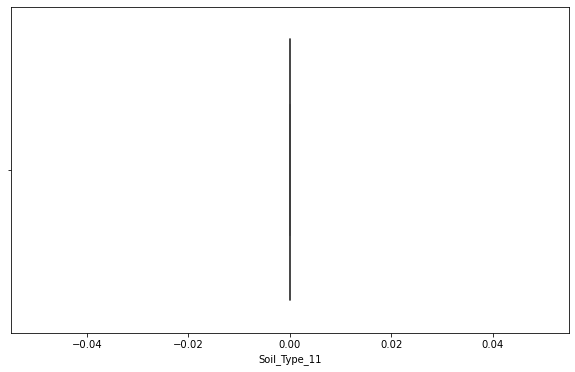

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


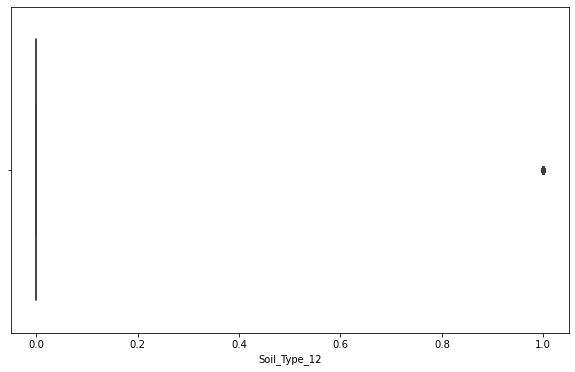

Soil_Type_12 sutununun alt sınır değeri = 0.0
Soil_Type_12 sutununun üst sınır değeri = 0.0
Soil_Type_12 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_12 tablosunda toplamda = 3934 aykırı üst veri vardır.


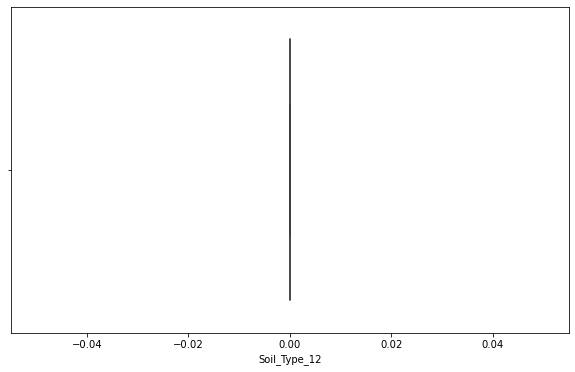

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


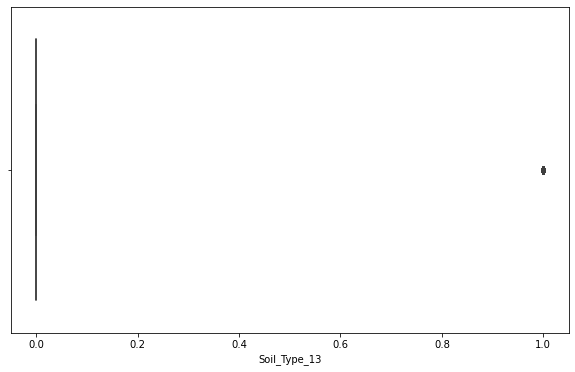

Soil_Type_13 sutununun alt sınır değeri = 0.0
Soil_Type_13 sutununun üst sınır değeri = 0.0
Soil_Type_13 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_13 tablosunda toplamda = 8017 aykırı üst veri vardır.


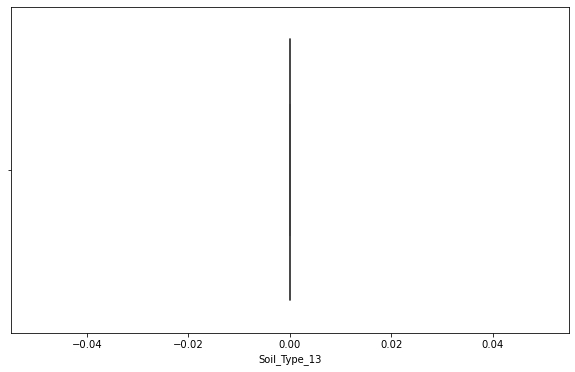

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


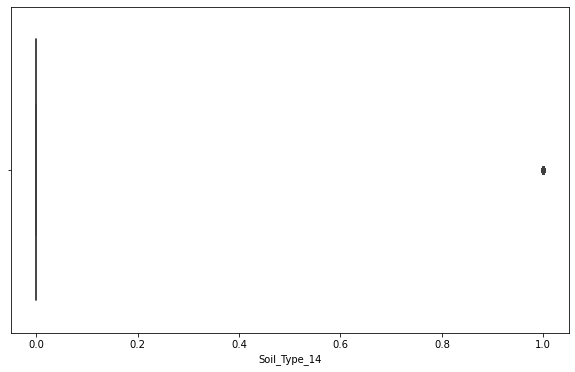

Soil_Type_14 sutununun alt sınır değeri = 0.0
Soil_Type_14 sutununun üst sınır değeri = 0.0
Soil_Type_14 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_14 tablosunda toplamda = 1577 aykırı üst veri vardır.


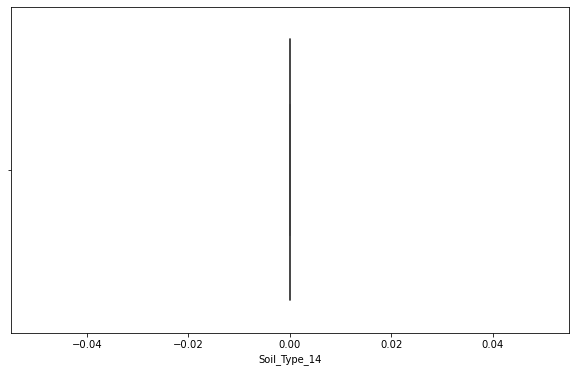

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


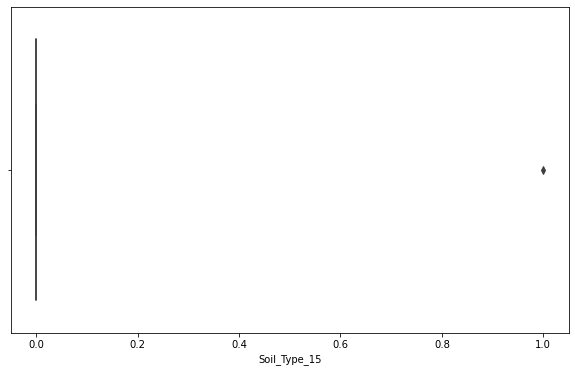

Soil_Type_15 sutununun alt sınır değeri = 0.0
Soil_Type_15 sutununun üst sınır değeri = 0.0
Soil_Type_15 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_15 tablosunda toplamda = 1 aykırı üst veri vardır.


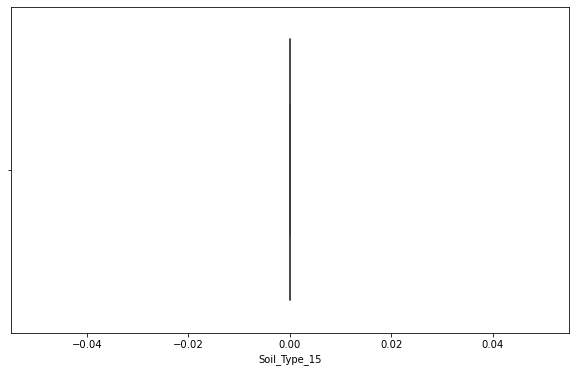

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


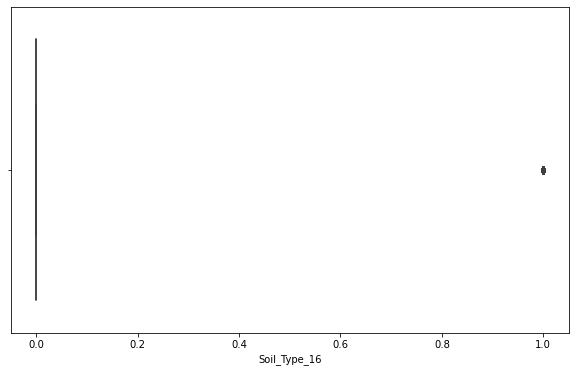

Soil_Type_16 sutununun alt sınır değeri = 0.0
Soil_Type_16 sutununun üst sınır değeri = 0.0
Soil_Type_16 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_16 tablosunda toplamda = 1151 aykırı üst veri vardır.


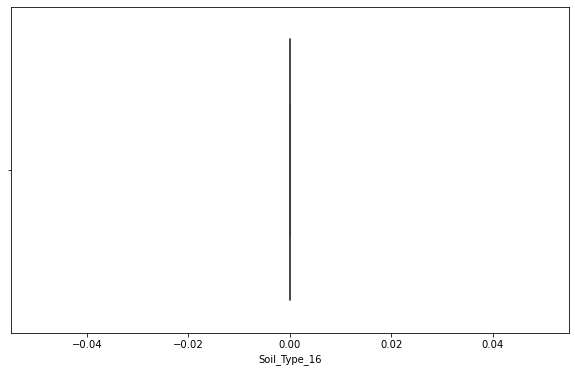

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


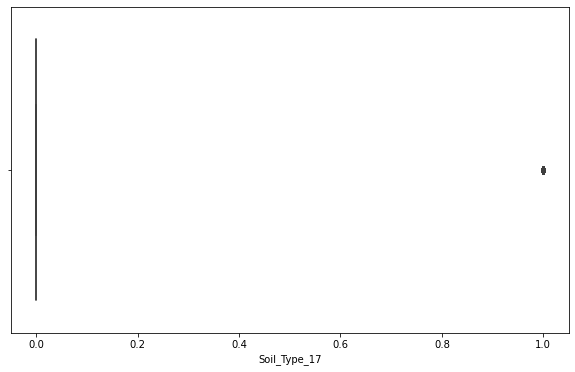

Soil_Type_17 sutununun alt sınır değeri = 0.0
Soil_Type_17 sutununun üst sınır değeri = 0.0
Soil_Type_17 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_17 tablosunda toplamda = 7633 aykırı üst veri vardır.


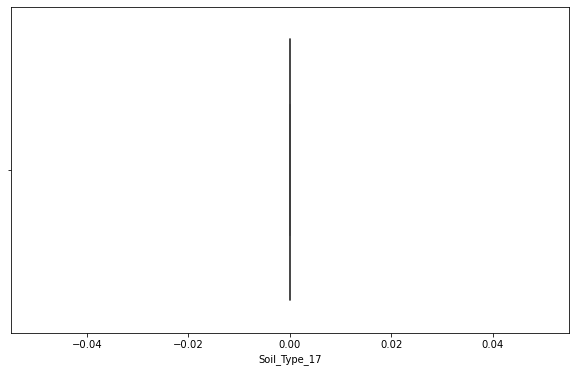

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


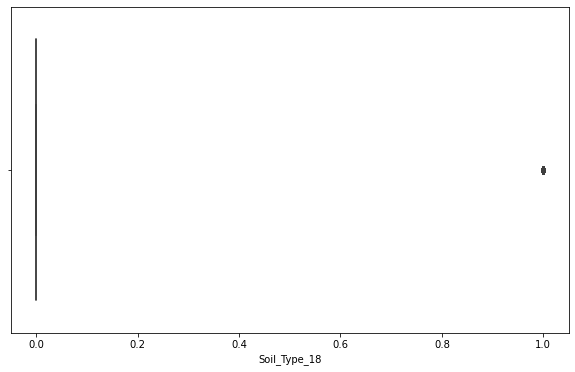

Soil_Type_18 sutununun alt sınır değeri = 0.0
Soil_Type_18 sutununun üst sınır değeri = 0.0
Soil_Type_18 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_18 tablosunda toplamda = 879 aykırı üst veri vardır.


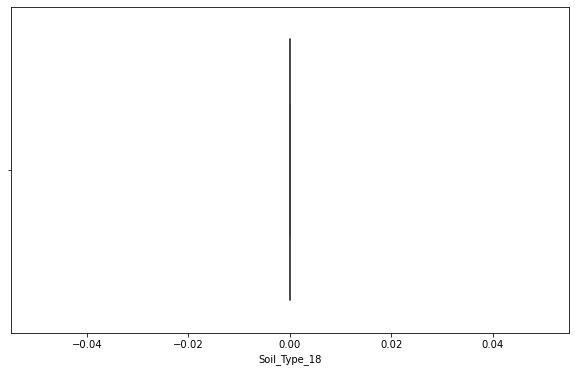

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


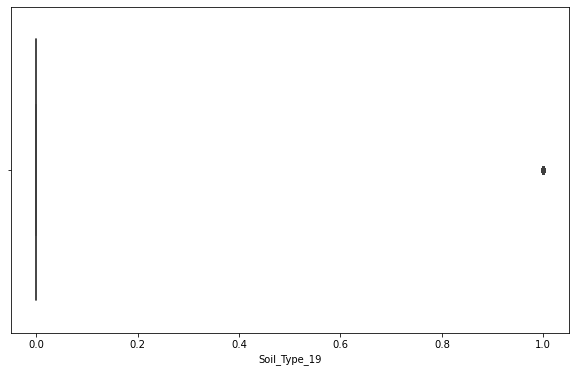

Soil_Type_19 sutununun alt sınır değeri = 0.0
Soil_Type_19 sutununun üst sınır değeri = 0.0
Soil_Type_19 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_19 tablosunda toplamda = 717 aykırı üst veri vardır.


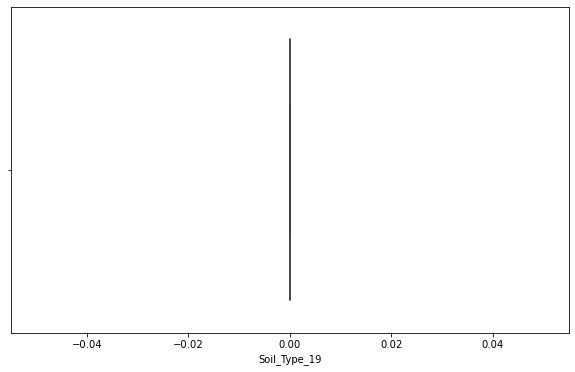

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


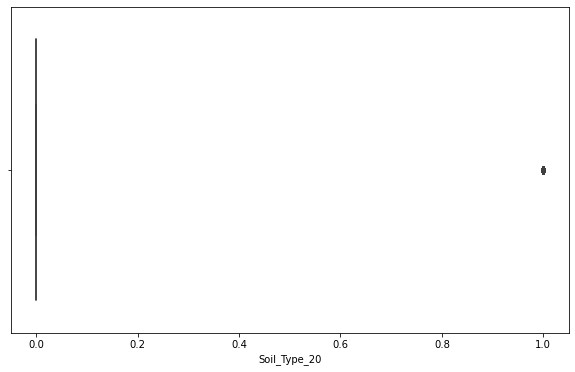

Soil_Type_20 sutununun alt sınır değeri = 0.0
Soil_Type_20 sutununun üst sınır değeri = 0.0
Soil_Type_20 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_20 tablosunda toplamda = 1895 aykırı üst veri vardır.


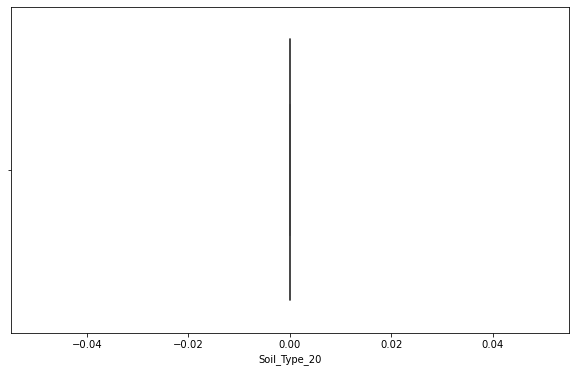

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


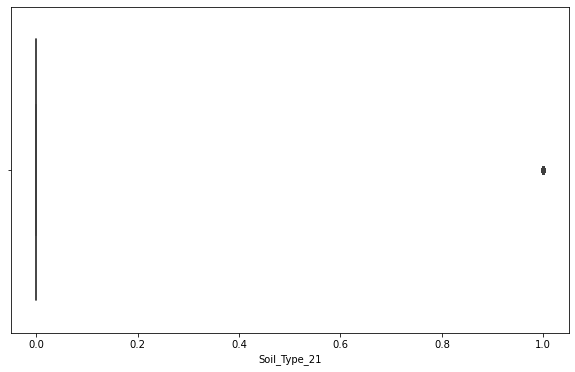

Soil_Type_21 sutununun alt sınır değeri = 0.0
Soil_Type_21 sutununun üst sınır değeri = 0.0
Soil_Type_21 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_21 tablosunda toplamda = 157 aykırı üst veri vardır.


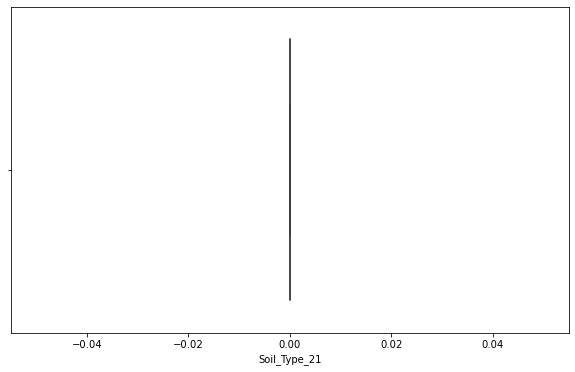

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


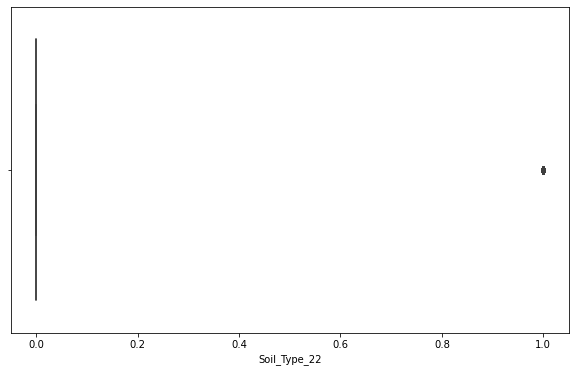

Soil_Type_22 sutununun alt sınır değeri = 0.0
Soil_Type_22 sutununun üst sınır değeri = 0.0
Soil_Type_22 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_22 tablosunda toplamda = 5501 aykırı üst veri vardır.


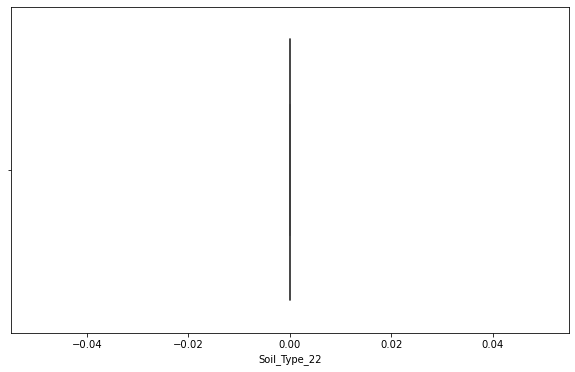

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


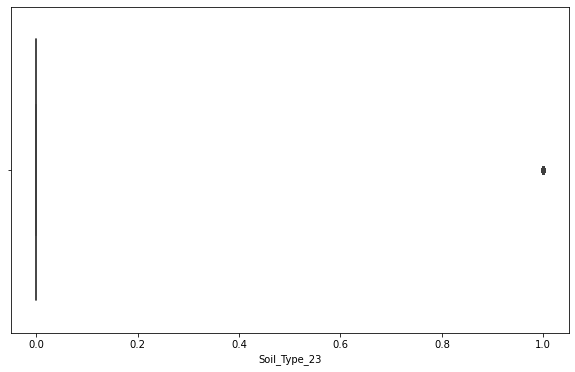

Soil_Type_23 sutununun alt sınır değeri = 0.0
Soil_Type_23 sutununun üst sınır değeri = 0.0
Soil_Type_23 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_23 tablosunda toplamda = 11890 aykırı üst veri vardır.


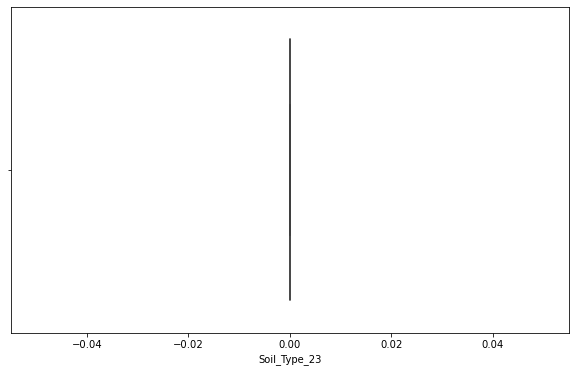

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


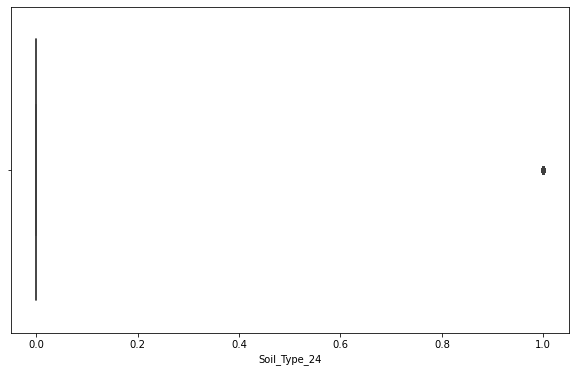

Soil_Type_24 sutununun alt sınır değeri = 0.0
Soil_Type_24 sutununun üst sınır değeri = 0.0
Soil_Type_24 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_24 tablosunda toplamda = 3850 aykırı üst veri vardır.


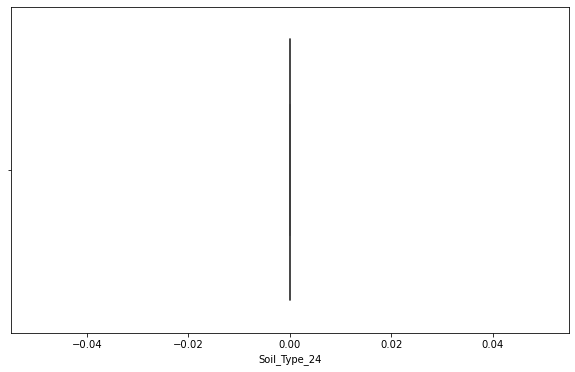

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


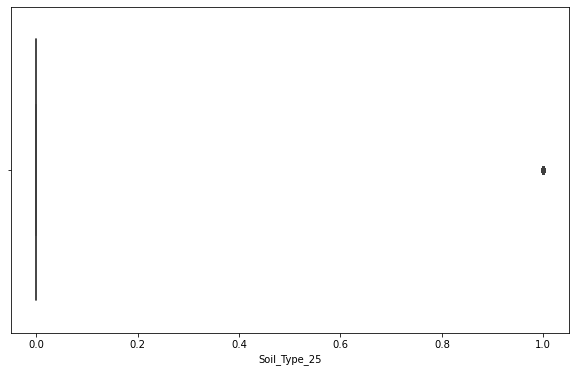

Soil_Type_25 sutununun alt sınır değeri = 0.0
Soil_Type_25 sutununun üst sınır değeri = 0.0
Soil_Type_25 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_25 tablosunda toplamda = 58 aykırı üst veri vardır.


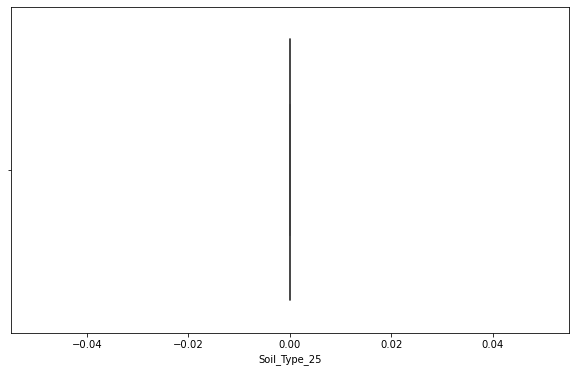

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


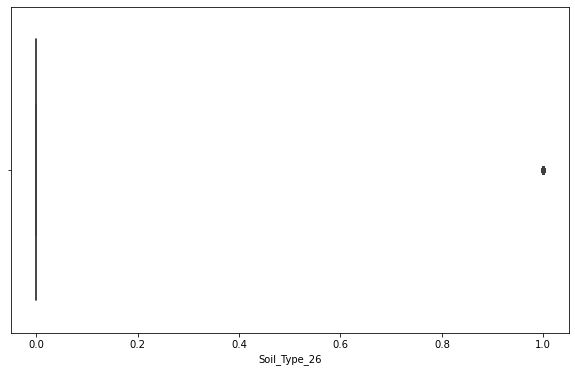

Soil_Type_26 sutununun alt sınır değeri = 0.0
Soil_Type_26 sutununun üst sınır değeri = 0.0
Soil_Type_26 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_26 tablosunda toplamda = 797 aykırı üst veri vardır.


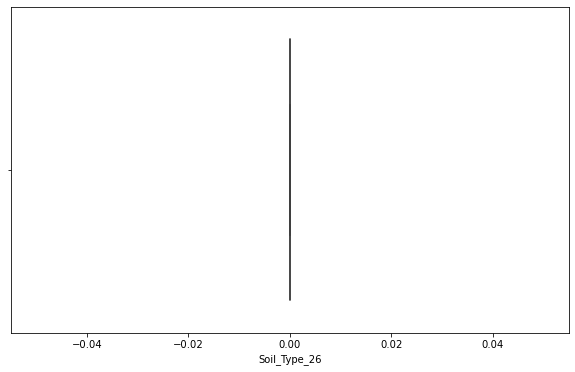

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


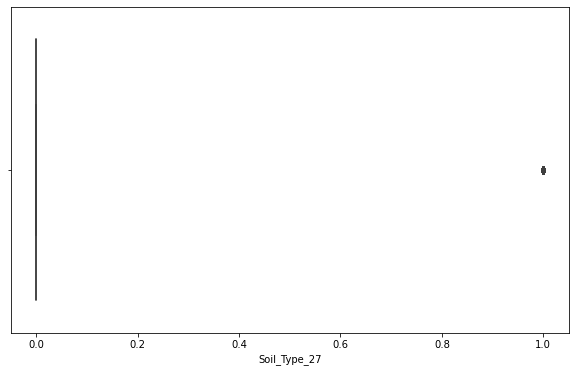

Soil_Type_27 sutununun alt sınır değeri = 0.0
Soil_Type_27 sutununun üst sınır değeri = 0.0
Soil_Type_27 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_27 tablosunda toplamda = 211 aykırı üst veri vardır.


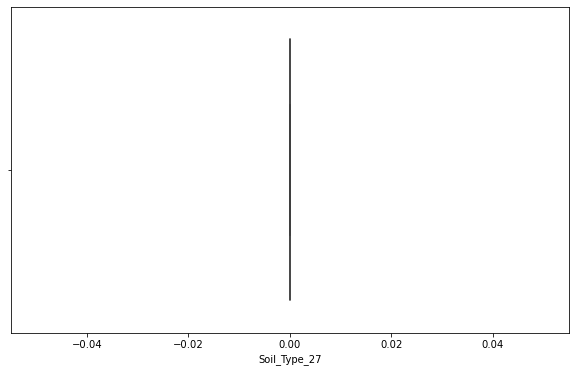

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


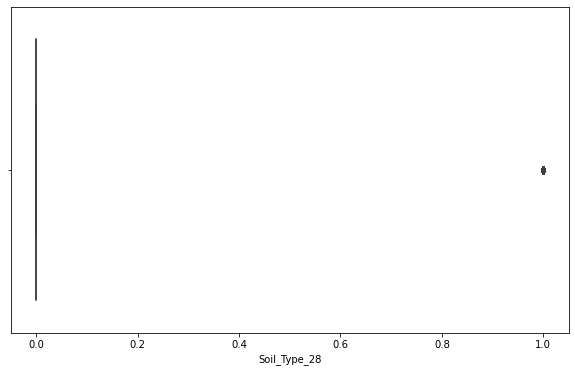

Soil_Type_28 sutununun alt sınır değeri = 0.0
Soil_Type_28 sutununun üst sınır değeri = 0.0
Soil_Type_28 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_28 tablosunda toplamda = 150 aykırı üst veri vardır.


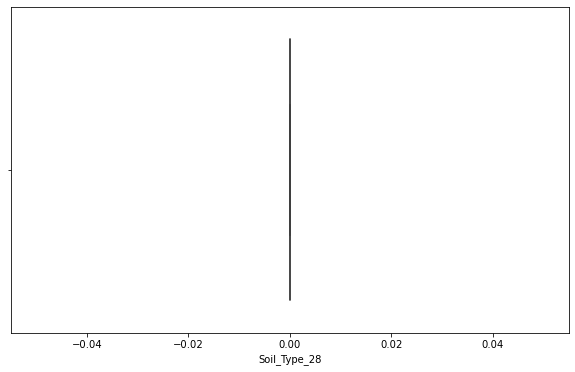

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


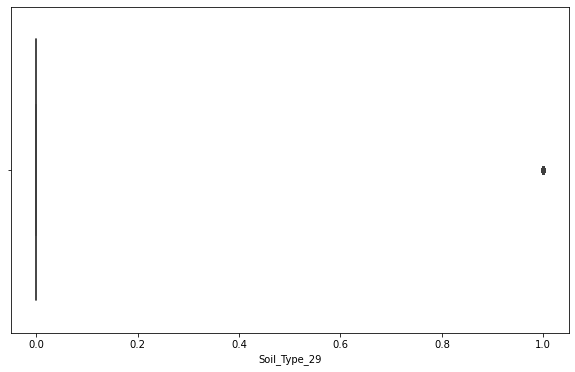

Soil_Type_29 sutununun alt sınır değeri = 0.0
Soil_Type_29 sutununun üst sınır değeri = 0.0
Soil_Type_29 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_29 tablosunda toplamda = 21182 aykırı üst veri vardır.


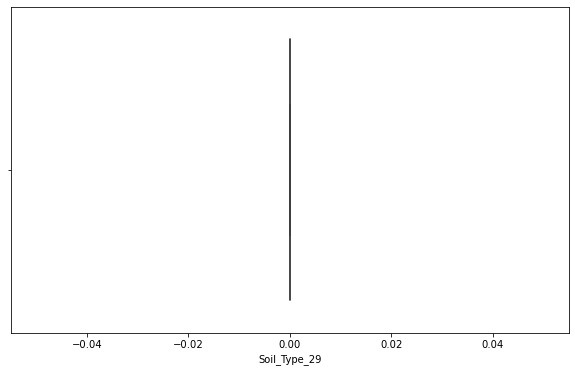

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


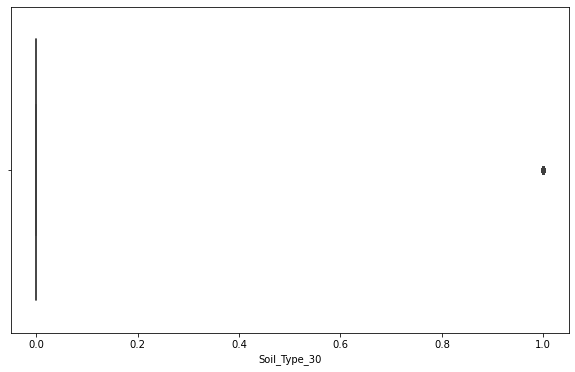

Soil_Type_30 sutununun alt sınır değeri = 0.0
Soil_Type_30 sutununun üst sınır değeri = 0.0
Soil_Type_30 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_30 tablosunda toplamda = 11738 aykırı üst veri vardır.


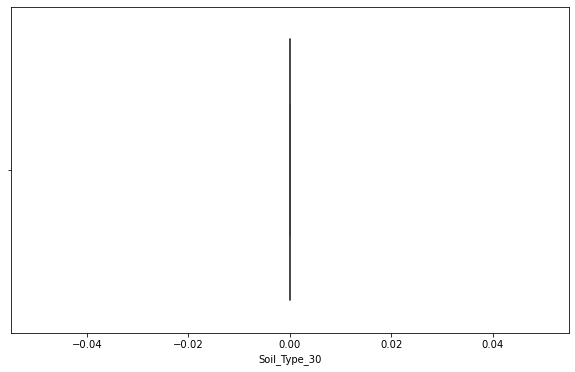

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


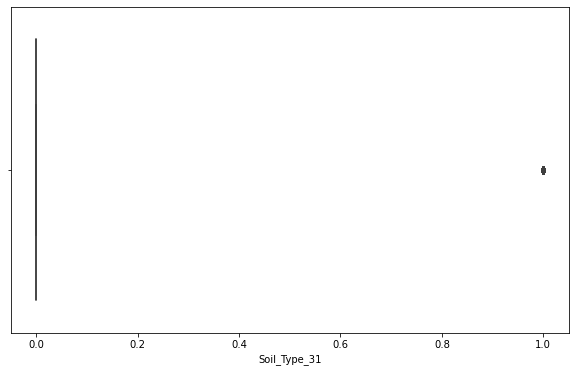

Soil_Type_31 sutununun alt sınır değeri = 0.0
Soil_Type_31 sutununun üst sınır değeri = 0.0
Soil_Type_31 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_31 tablosunda toplamda = 4997 aykırı üst veri vardır.


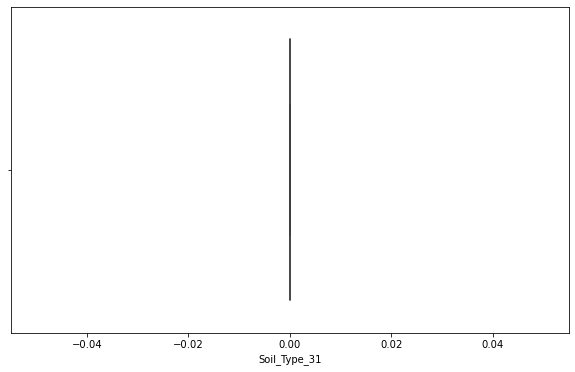

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


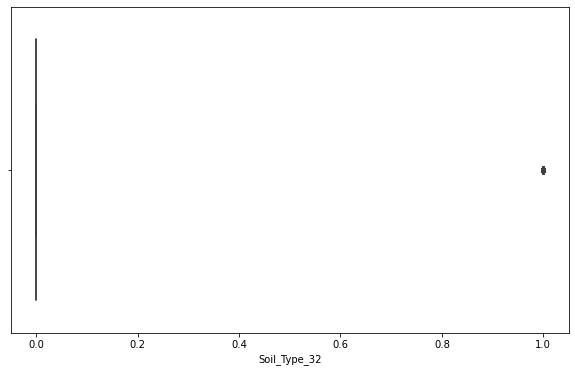

Soil_Type_32 sutununun alt sınır değeri = 0.0
Soil_Type_32 sutununun üst sınır değeri = 0.0
Soil_Type_32 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_32 tablosunda toplamda = 10395 aykırı üst veri vardır.


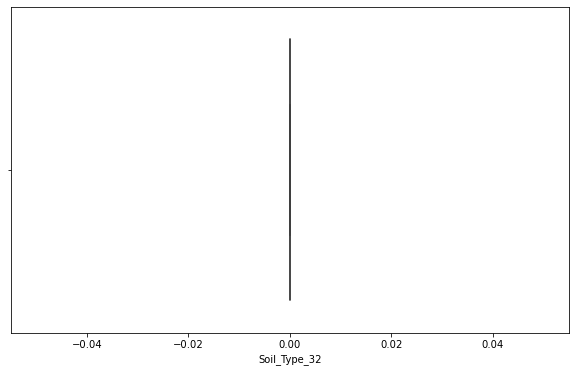

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


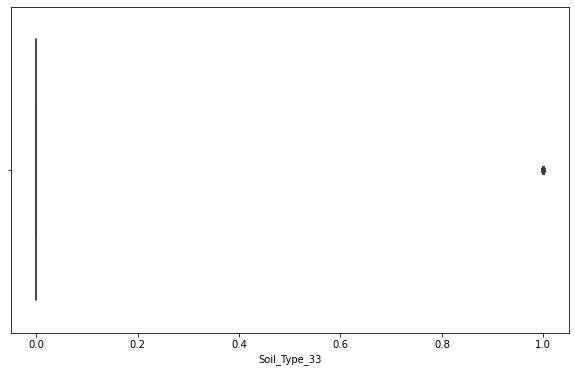

Soil_Type_33 sutununun alt sınır değeri = 0.0
Soil_Type_33 sutununun üst sınır değeri = 0.0
Soil_Type_33 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_33 tablosunda toplamda = 9970 aykırı üst veri vardır.


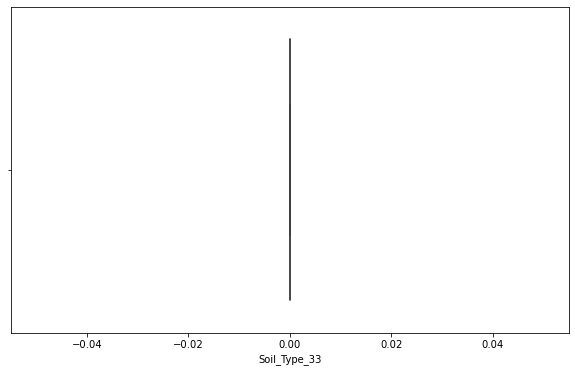

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


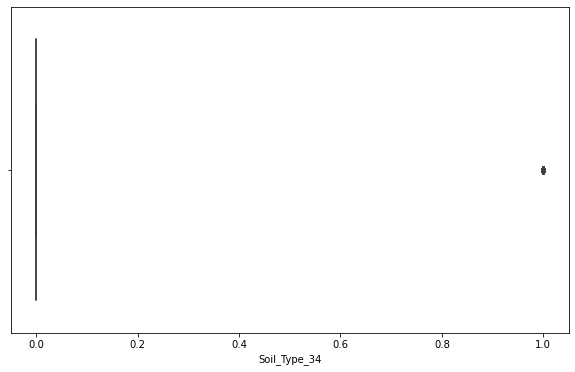

Soil_Type_34 sutununun alt sınır değeri = 0.0
Soil_Type_34 sutununun üst sınır değeri = 0.0
Soil_Type_34 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_34 tablosunda toplamda = 375 aykırı üst veri vardır.


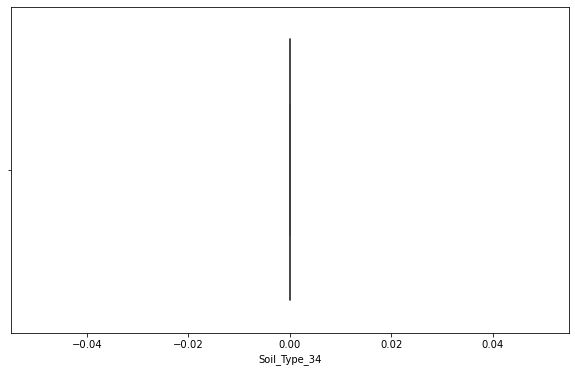

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


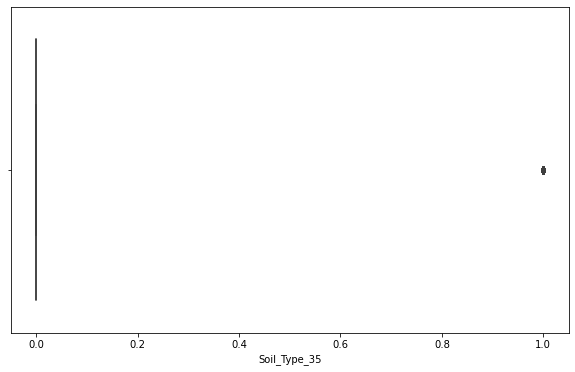

Soil_Type_35 sutununun alt sınır değeri = 0.0
Soil_Type_35 sutununun üst sınır değeri = 0.0
Soil_Type_35 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_35 tablosunda toplamda = 1616 aykırı üst veri vardır.


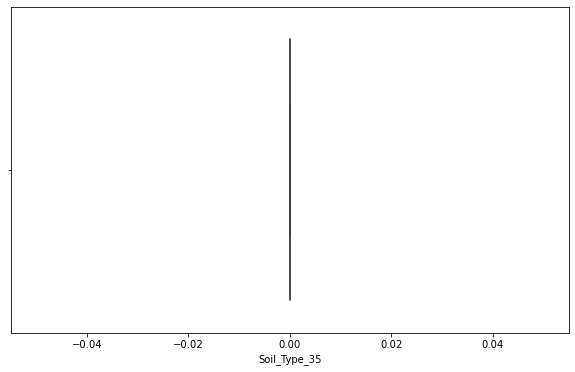

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


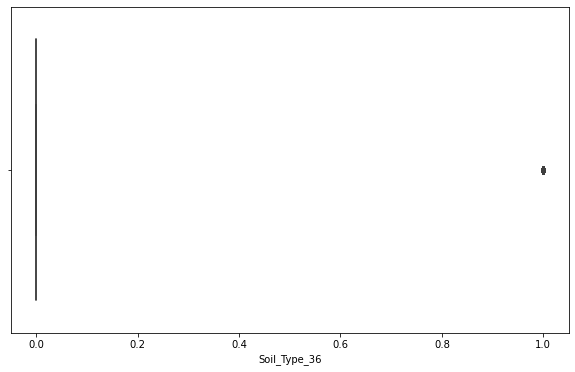

Soil_Type_36 sutununun alt sınır değeri = 0.0
Soil_Type_36 sutununun üst sınır değeri = 0.0
Soil_Type_36 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_36 tablosunda toplamda = 99 aykırı üst veri vardır.


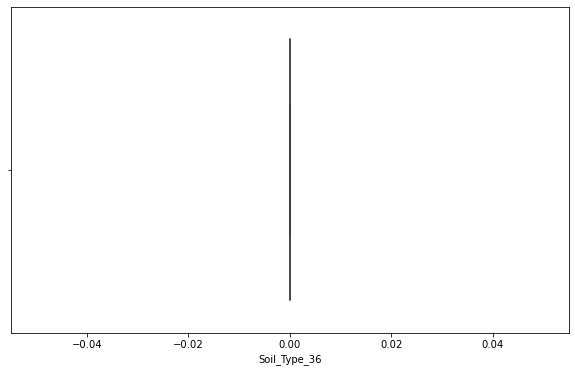

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


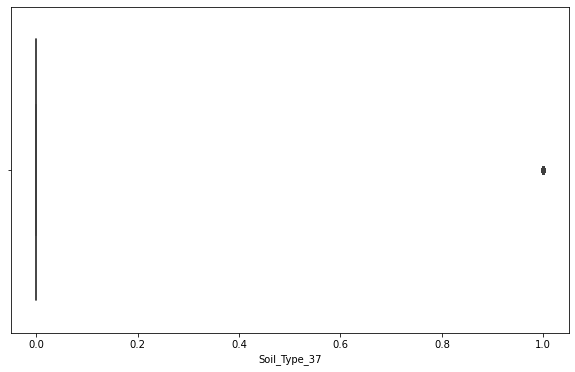

Soil_Type_37 sutununun alt sınır değeri = 0.0
Soil_Type_37 sutununun üst sınır değeri = 0.0
Soil_Type_37 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_37 tablosunda toplamda = 463 aykırı üst veri vardır.


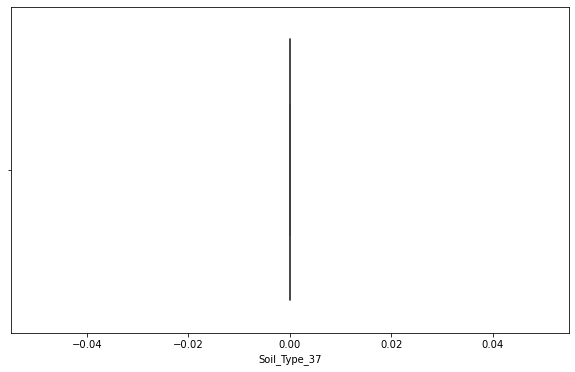

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


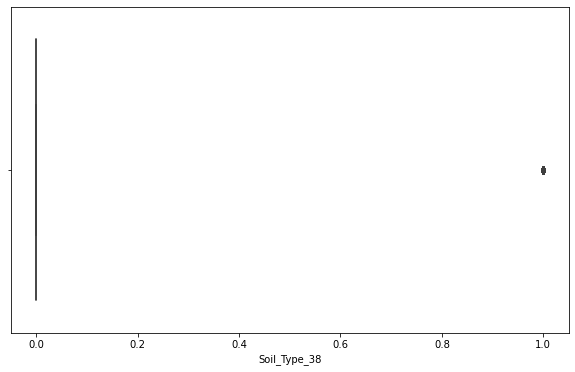

Soil_Type_38 sutununun alt sınır değeri = 0.0
Soil_Type_38 sutununun üst sınır değeri = 0.0
Soil_Type_38 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_38 tablosunda toplamda = 11505 aykırı üst veri vardır.


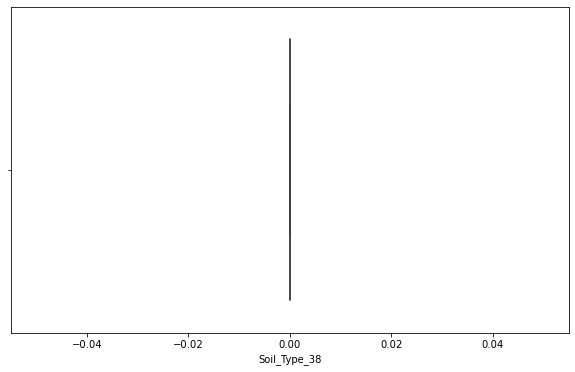

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


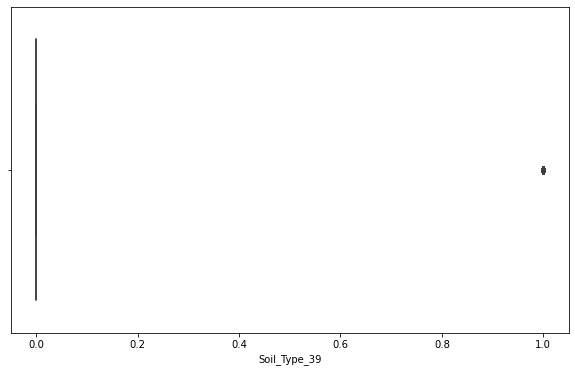

Soil_Type_39 sutununun alt sınır değeri = 0.0
Soil_Type_39 sutununun üst sınır değeri = 0.0
Soil_Type_39 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_39 tablosunda toplamda = 10347 aykırı üst veri vardır.


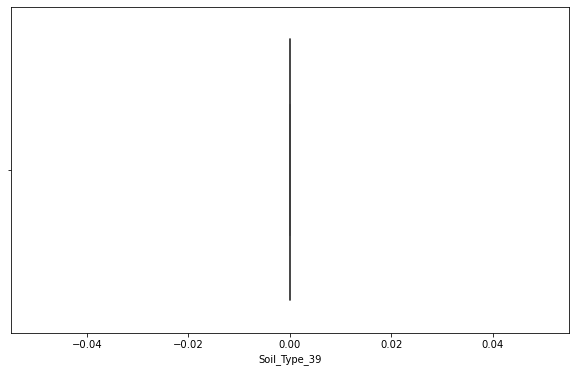

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


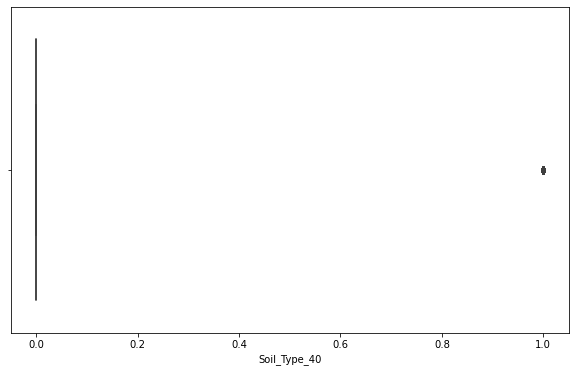

Soil_Type_40 sutununun alt sınır değeri = 0.0
Soil_Type_40 sutununun üst sınır değeri = 0.0
Soil_Type_40 tablosunda toplamda = 0 aykırı alt veri vardır.
Soil_Type_40 tablosunda toplamda = 6723 aykırı üst veri vardır.


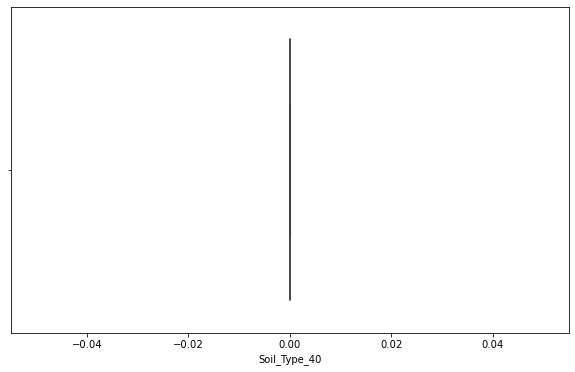

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


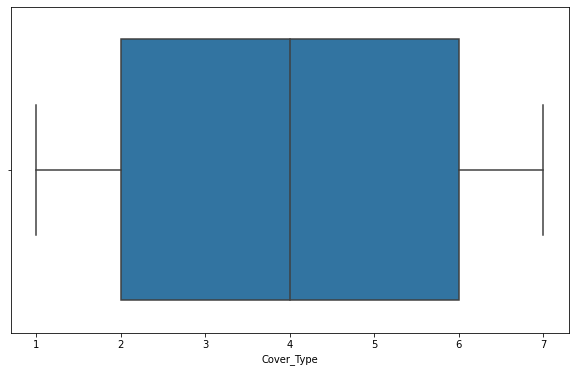

Cover_Type sutununun alt sınır değeri = -4.0
Cover_Type sutununun üst sınır değeri = 12.0
Cover_Type tablosunda toplamda = 0 aykırı alt veri vardır.
Cover_Type tablosunda toplamda = 0 aykırı üst veri vardır.


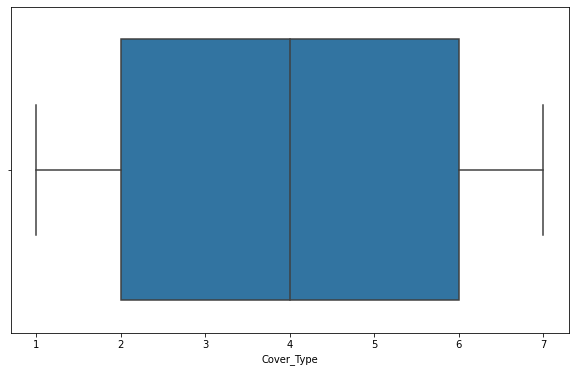

Tüm ayrık değerler sınır değerleri ile doldurulmuştur.


In [90]:
# Outlier silmek istemedim. onun için.
for i in df.columns[0:]:
    sns.boxplot(x=df[i]);
    plt.show()
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1-(1.5*IQR)
    ust_sinir = Q3+(1.5*IQR)
    print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
    aykiri_alt = df[i] < alt_sinir
    aykiri_ust = df[i] > ust_sinir
    print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
    df[i][aykiri_alt] = alt_sinir
    df[i][aykiri_ust] = ust_sinir
    sns.boxplot(x=df[i]);
    plt.show()
    print("Tüm ayrık değerler sınır değerleri ile doldurulmuştur.")

### Feature Engineering : 

In [ ]:
df["Hypotenuse"] = (df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)**0.5
df["Avg_hydro_roadway"] = (df["Horizontal_Distance_To_Hydrology"] + df["Horizontal_Distance_To_Roadways"])/2
df["Avarage_vertical_elevation"] = (df["Vertical_Distance_To_Hydrology"] + df["Elevation"])/2
df.drop(columns=["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology"], axis=1, inplace=True)

### Modelling Performance : 

In [93]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [94]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [95]:
X = df.drop(columns = "Cover_Type", axis=1)
y = df["Cover_Type"]

### Train _test split : 

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic_Regression : 

In [109]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight="balanced")
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6609 1746    4    0  592   66 1758]
 [2379 5148  201    2 2397  443  243]
 [   0   54 4903 1655  742 3193    0]
 [   0    0  754 9308    0  569    0]
 [  30 1877  172    0 8276  523    0]
 [   0  184 2093 1197  405 6788    0]
 [1303   13    0    0   48    0 9325]]
              precision    recall  f1-score   support

           1       0.64      0.61      0.63     10775
           2       0.57      0.48      0.52     10813
           3       0.60      0.46      0.53     10547
           4       0.77      0.88      0.82     10631
           5       0.66      0.76      0.71     10878
           6       0.59      0.64      0.61     10667
           7       0.82      0.87      0.85     10689

    accuracy                           0.67     75000
   macro avg       0.66      0.67      0.66     75000
weighted avg       0.66      0.67      0.66     75000


Train_Set
[[15539  4022    10     0  1366   160  3964]
 [ 5631 11743   473     5  5487  1072   556]
 [    0   164 11522  3951 

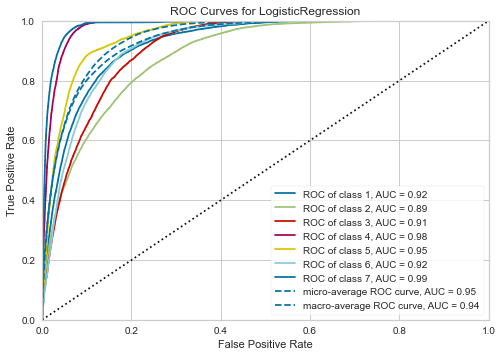

In [104]:
from yellowbrick.classifier import ROCAUC
model = log_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

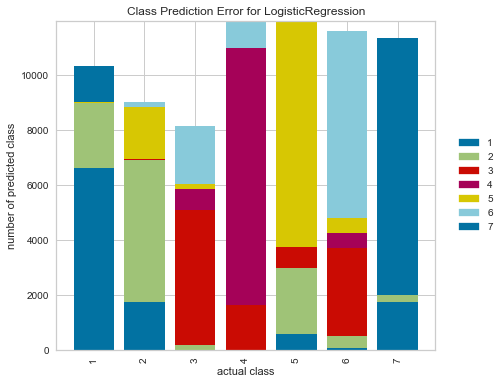

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [105]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

In [110]:
log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average = "macro")
log_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
log_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
log_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
log_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

### KNN : 

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm = "kd_tree")
knn_model.fit(X_train_scaled, y_train)
y_pred_proba=knn_model.predict_proba(X_test_scaled)
y_pred=knn_model.predict(X_test_scaled)
y_train_pred=knn_model.predict(X_train_scaled)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 8812  1248     7     0   200    32   476]
 [ 1421  8146   211     3   703   234    95]
 [    1    40  9458   276    60   712     0]
 [    0     0    25 10591     0    15     0]
 [   10    30    23     0 10806     9     0]
 [    3    15   361   151    35 10102     0]
 [   72    11     0     0     5     0 10601]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.84     10775
           2       0.86      0.75      0.80     10813
           3       0.94      0.90      0.92     10547
           4       0.96      1.00      0.98     10631
           5       0.92      0.99      0.95     10878
           6       0.91      0.95      0.93     10667
           7       0.95      0.99      0.97     10689

    accuracy                           0.91     75000
   macro avg       0.91      0.91      0.91     75000
weighted avg       0.91      0.91      0.91     75000


Train_Set
[[22095  1847    10     0   312    29   768]
 [ 2105 20670   400   

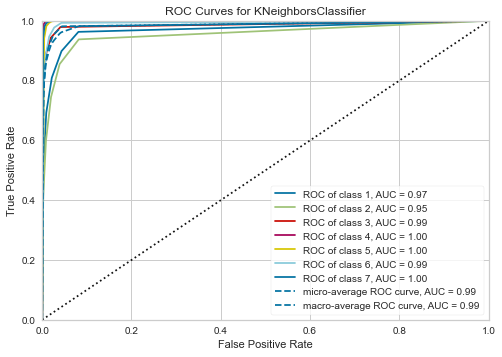

In [128]:
model = knn_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

In [126]:
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average = "macro")
knn_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
knn_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
knn_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
knn_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

### SVM :

In [119]:
from sklearn.svm import SVC, LinearSVC
svm_model = LinearSVC(class_weight = "balanced", random_state = 38)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 8812  1248     7     0   200    32   476]
 [ 1421  8146   211     3   703   234    95]
 [    1    40  9458   276    60   712     0]
 [    0     0    25 10591     0    15     0]
 [   10    30    23     0 10806     9     0]
 [    3    15   361   151    35 10102     0]
 [   72    11     0     0     5     0 10601]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.84     10775
           2       0.86      0.75      0.80     10813
           3       0.94      0.90      0.92     10547
           4       0.96      1.00      0.98     10631
           5       0.92      0.99      0.95     10878
           6       0.91      0.95      0.93     10667
           7       0.95      0.99      0.97     10689

    accuracy                           0.91     75000
   macro avg       0.91      0.91      0.91     75000
weighted avg       0.91      0.91      0.91     75000


Train_Set
[[22095  1847    10     0   312    29   768]
 [ 2105 20670   400   

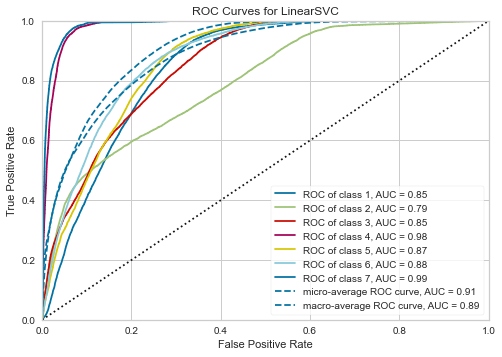

In [129]:
model = svm_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();  

In [120]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")

### Random Forest :

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 8812  1248     7     0   200    32   476]
 [ 1421  8146   211     3   703   234    95]
 [    1    40  9458   276    60   712     0]
 [    0     0    25 10591     0    15     0]
 [   10    30    23     0 10806     9     0]
 [    3    15   361   151    35 10102     0]
 [   72    11     0     0     5     0 10601]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.84     10775
           2       0.86      0.75      0.80     10813
           3       0.94      0.90      0.92     10547
           4       0.96      1.00      0.98     10631
           5       0.92      0.99      0.95     10878
           6       0.91      0.95      0.93     10667
           7       0.95      0.99      0.97     10689

    accuracy                           0.91     75000
   macro avg       0.91      0.91      0.91     75000
weighted avg       0.91      0.91      0.91     75000


Train_Set
[[22095  1847    10     0   312    29   768]
 [ 2105 20670   400   

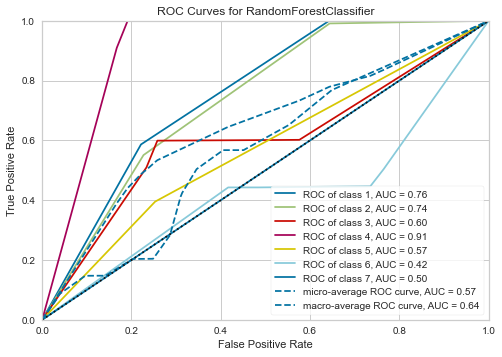

In [130]:
model = rf_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();  

In [122]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "macro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

### XGBoost

In [123]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=38)
xgb_model.fit(X_train, y_train)
y_pred_proba=xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

[18:20:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test_Set
[[ 8812  1248     7     0   200    32   476]
 [ 1421  8146   211     3   703   234    95]
 [    1    40  9458   276    60   712     0]
 [    0     0    25 10591     0    15     0]
 [   10    30    23     0 10806     9     0]
 [    3    15   361   151    35 10102     0]
 [   72    11     0     0     5     0 10601]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.84     10775
           2       0.86      0.75      0.80     10813
           3       0.94      0.90      0.92     10547
           4       0.96      1.00      0.98     10631
           5       0.92      0.99      0.95     10878
           6       0.91      0.95      0.93     10667
           7       0.95      0.99      0.97

In [124]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "macro")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
xgb_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

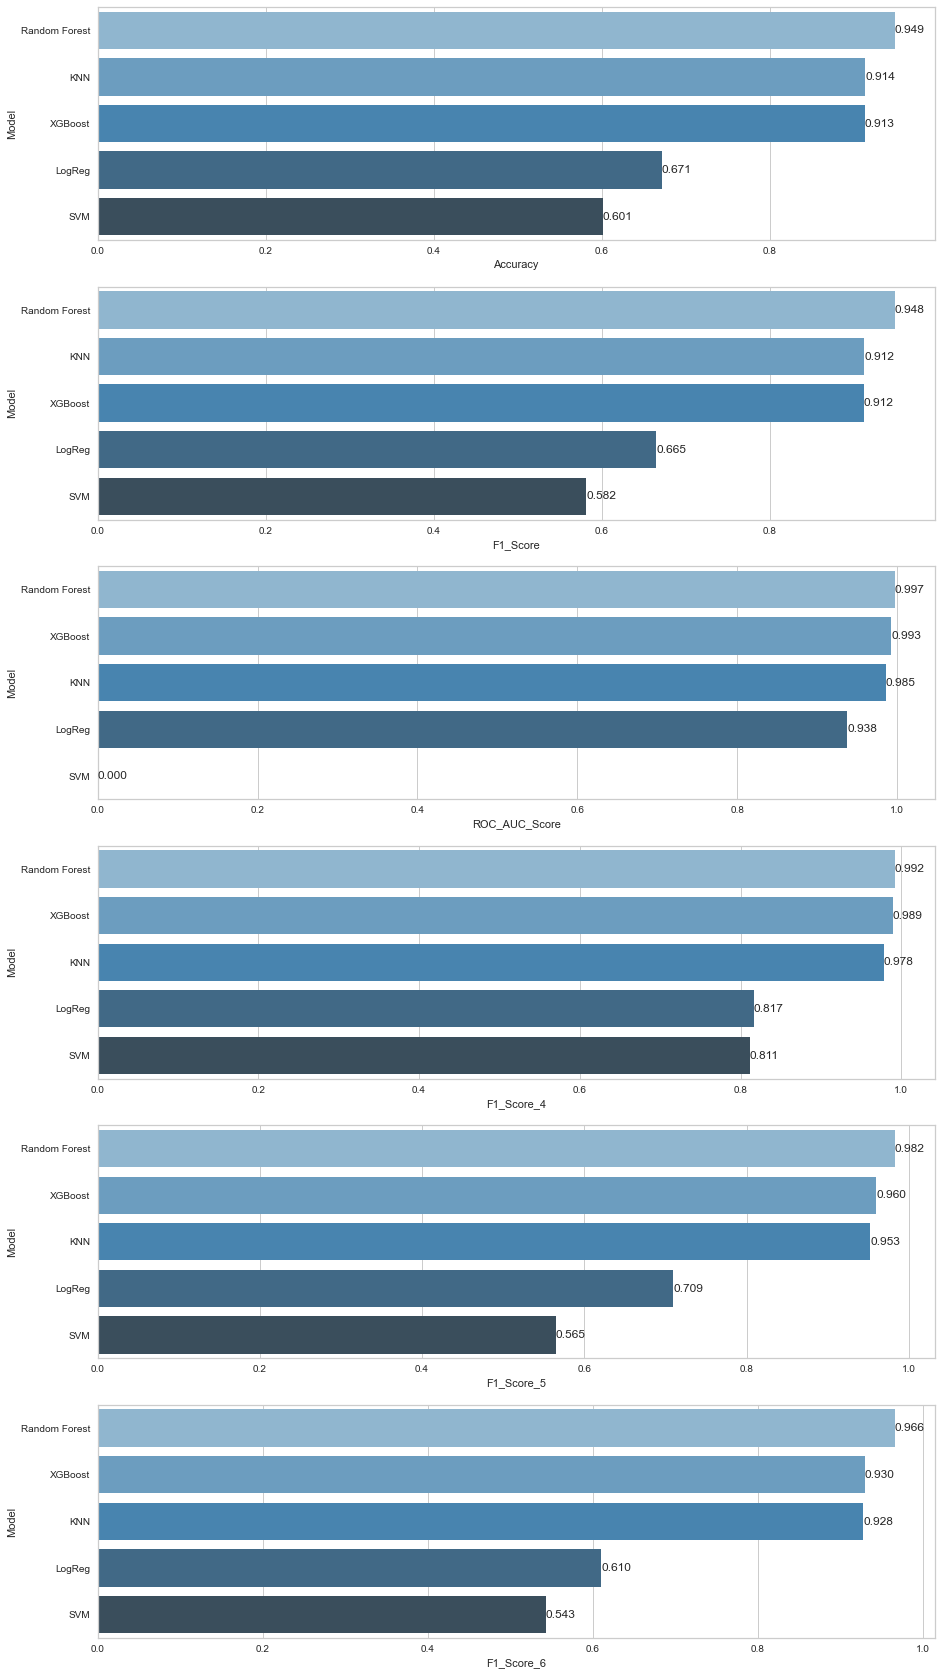

In [127]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "Random Forest", "XGBoost"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, rf_acc, xgb_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, rf_f1, xgb_f1],
                        "F1_Score_4": [log_f1_4, knn_f1_4, svm_f1_4, rf_f1_4, xgb_f1_4],
                        "F1_Score_5": [log_f1_5, knn_f1_5, svm_f1_5, rf_f1_5, xgb_f1_5],
                        "F1_Score_6": [log_f1_6, knn_f1_6, svm_f1_6, rf_f1_6, xgb_f1_6],
                        "ROC_AUC_Score": [log_auc, knn_auc, 0, rf_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()